# **Data Narrative**

**Introduction:**

In the modern urban landscape, bike-sharing programs have emerged as a sustainable mode of transportation, offering an eco-friendly alternative to traditional vehicular commute. The proliferation of these systems worldwide has not only alleviated traffic congestion and contributed to environmental preservation but has also generated an invaluable trove of data, marking them as pivotal sensors for urban mobility.

**Business Purpose:**
● Demand Prediction: Predict high or
low demand days.
● Holiday Impact: Assess the effect of
holidays on demand.
● Weather Conditions: Categorize days
based on weather conditions.
● Seasonal Trends: Classify days into
different seasons

**Business Tangent:**
The objective of this Colab notebook is to conduct a comprehensive analysis of bike-sharing data, primarily sourced from the Capital Bikeshare system of Washington D.C., encompassing records from 2011 and 2012. The aim is to unravel the intricate relationship between external factors, such as weather conditions, time variables, and bike rental patterns. The crux of this investigation centers around the development of a robust regression model capable of predicting hourly or daily bike rental counts based on the aforementioned parameters. Furthermore, the research sheds light on the potential of this data in event and anomaly detection, given the strong correlation between significant city events and bike rental anomalies.

**Storytelling:**
This project holds significant potential for urban planners, bike-sharing service providers, and policymakers. By understanding the factors that influence bike rental patterns, cities can optimize the placement of bike-sharing stations, allocate resources more efficiently, and encourage greater adoption of sustainable transportation. Additionally, the predictive model can be a valuable tool for bike-sharing services, enabling them to manage their fleets effectively and meet the demand for bikes during different times of the day and year.

Furthermore, the project explores the connection between major city events and anomalies in bike rentals. Understanding how city events impact bike rental patterns can aid in event planning, resource allocation, and ensuring a smooth experience for residents and visitors.

Overall, this research project aims to enhance the efficiency of bike-sharing systems, ensuring timely availability and fostering a harmonious integration of these systems into the urban fabric. It offers valuable insights into urban mobility and contributes to the promotion of sustainable transportation in our cities.

**Experiment:**

● How can we accurately predict the
demand for bike rentals based on
various factors, such as weather,
season, temperature, humidity, wind
speed, and holidays?

● What properties should be invested
in to maximize bike rental
profitability ?

● What is the relationship between
temperature levels and bike rental
demand, and how can this
information be used to optimize bike
availability?

In [ ]:
!pip install -qU pydotplus pyclustering graphviz

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 24.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done


##Importing Libraries

In [ ]:
import time
import itertools
from collections import Counter
from datetime import datetime, date

import numpy as np
import pandas as pd

from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler, RobustScaler
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, StratifiedKFold

from sklearn import tree
from sklearn.svm import SVC
from sklearn import mixture
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPClassifier, MLPRegressor
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.cluster import AgglomerativeClustering, DBSCAN, MeanShift, SpectralClustering, estimate_bandwidth, KMeans
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier, GradientBoostingRegressor, AdaBoostClassifier
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier, NearestNeighbors

from sklearn import metrics
from sklearn.metrics import classification_report, cohen_kappa_score, mean_squared_error
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, silhouette_score
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve, precision_recall_curve

import statsmodels
import statsmodels.api as sm
from scipy import linalg
from scipy.stats import probplot
from scipy.cluster.hierarchy import linkage

# plotting
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
from matplotlib.ticker import FuncFormatter
from matplotlib.colors import ListedColormap

from warnings import filterwarnings
filterwarnings('ignore')

pd.options.display.max_columns = None
pd.options.display.max_rows = None
pd.options.display.float_format = '{:.6f}'.format

import pydotplus
from IPython.display import Image

In [ ]:
names = [
    "Linear Regression",
    "MLP Regressor",
    "RandomForest Regressor",
    "Gradient Boosting Regressor",
    "KNeighbors Regressor"
         ]

classifiers = [
    LinearRegression(),
    MLPRegressor(random_state=1, max_iter=500),
    RandomForestRegressor(max_depth=4, random_state=1),
    GradientBoostingRegressor(random_state=1),
    KNeighborsRegressor(n_neighbors=2)
    ]

regressors = [
    LinearRegression(),
    MLPRegressor(random_state=1, max_iter=500),
    RandomForestRegressor(max_depth=4, random_state=1),
    GradientBoostingRegressor(random_state=1),
    KNeighborsRegressor(n_neighbors=2)
    ]

##Dataset1

In [ ]:
url1 ='https://drive.google.com/uc?id=10wKdg9HnqQ_o9UZatlAsTMfiIpg8NtMq' # data1.csv -> "https://drive.google.com/file/d/10wKdg9HnqQ_o9UZatlAsTMfiIpg8NtMq/view?usp=drive_link"
data1 = pd.read_csv(url1)
data1.to_csv("data1.csv", index=False)
data1.head(5)

instant      dteday  season  yr  mnth  hr  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1   0        0        6           0   
1        2  2011-01-01       1   0     1   1        0        6           0   
2        3  2011-01-01       1   0     1   2        0        6           0   
3        4  2011-01-01       1   0     1   3        0        6           0   
4        5  2011-01-01       1   0     1   4        0        6           0   

   weathersit     temp    atemp      hum  windspeed  casual  registered  cnt  
0           1 0.240000 0.287900 0.810000   0.000000       3          13   16  
1           1 0.220000 0.272700 0.800000   0.000000       8          32   40  
2           1 0.220000 0.272700 0.800000   0.000000       5          27   32  
3           1 0.240000 0.287900 0.750000   0.000000       3          10   13  
4           1 0.240000 0.287900 0.750000   0.000000       0           1    1

In [ ]:
data1["date"] = pd.to_datetime(data1.dteday)
data1 = data1.drop(["instant", "dteday"], axis=1)

In [ ]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   season      17379 non-null  int64         
 1   yr          17379 non-null  int64         
 2   mnth        17379 non-null  int64         
 3   hr          17379 non-null  int64         
 4   holiday     17379 non-null  int64         
 5   weekday     17379 non-null  int64         
 6   workingday  17379 non-null  int64         
 7   weathersit  17379 non-null  int64         
 8   temp        17379 non-null  float64       
 9   atemp       17379 non-null  float64       
 10  hum         17379 non-null  float64       
 11  windspeed   17379 non-null  float64       
 12  casual      17379 non-null  int64         
 13  registered  17379 non-null  int64         
 14  cnt         17379 non-null  int64         
 15  date        17379 non-null  datetime64[ns]
dtypes: datetime64[ns](1), 

In [ ]:
data1.nunique()

season          4
yr              2
mnth           12
hr             24
holiday         2
weekday         7
workingday      2
weathersit      4
temp           50
atemp          65
hum            89
windspeed      30
casual        322
registered    776
cnt           869
date          731
dtype: int64

In [ ]:
data1.describe()

season           yr         mnth           hr      holiday  \
count 17379.000000 17379.000000 17379.000000 17379.000000 17379.000000   
mean      2.501640     0.502561     6.537775    11.546752     0.028770   
std       1.106918     0.500008     3.438776     6.914405     0.167165   
min       1.000000     0.000000     1.000000     0.000000     0.000000   
25%       2.000000     0.000000     4.000000     6.000000     0.000000   
50%       3.000000     1.000000     7.000000    12.000000     0.000000   
75%       3.000000     1.000000    10.000000    18.000000     0.000000   
max       4.000000     1.000000    12.000000    23.000000     1.000000   

           weekday   workingday   weathersit         temp        atemp  \
count 17379.000000 17379.000000 17379.000000 17379.000000 17379.000000   
mean      3.003683     0.682721     1.425283     0.496987     0.475775   
std       2.005771     0.465431     0.639357     0.192556     0.171850   
min       0.000000     0.000000     1.000000     0.020000     0.000000   
25%       1.000000     0.000000     1.000000     0.340000     0.333300   
50%       3.000000     1.000000     1.000000     0.500000     0.484800   
75%       5.000000     1.000000     2.000000     0.660000     0.621200   
max       6.000000     1.000000     4.000000     1.000000     1.000000   

               hum    windspeed       casual   registered          cnt  
count 17379.000000 17379.000000 17379.000000 17379.000000 17379.000000  
mean      0.627229     0.190098    35.676218   153.786869   189.463088  
std       0.192930     0.122340    49.305030   151.357286   181.387599  
min       0.000000     0.000000     0.000000     0.000000     1.000000  
25%       0.480000     0.104500     4.000000    34.000000    40.000000  
50%       0.630000     0.194000    17.000000   115.000000   142.000000  
75%       0.780000     0.253700    48.000000   220.000000   281.000000  
max       1.000000     0.850700   367.000000   886.000000   977.000000

In [ ]:
data1.isnull().sum()

season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
date          0
dtype: int64

##Dataset2

In [ ]:
url2 ='https://drive.google.com/uc?id=1yVL1fUAfZ5ktpPbaAAF8zQrLlBAicgN7' # SeoulBikeData -> https://drive.google.com/file/d/1yVL1fUAfZ5ktpPbaAAF8zQrLlBAicgN7/view?usp=drive_link
data2 = pd.read_csv(url2, encoding='unicode_escape')
data2.head(5)
data2.to_csv("data2.csv", index=False)

In [ ]:
data2["Date"] = pd.to_datetime(data2["Date"])

In [ ]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Date                       8760 non-null   datetime64[ns]
 1   Rented Bike Count          8760 non-null   int64         
 2   Hour                       8760 non-null   int64         
 3   Temperature(°C)            8760 non-null   float64       
 4   Humidity(%)                8760 non-null   int64         
 5   Wind speed (m/s)           8760 non-null   float64       
 6   Visibility (10m)           8760 non-null   int64         
 7   Dew point temperature(°C)  8760 non-null   float64       
 8   Solar Radiation (MJ/m2)    8760 non-null   float64       
 9   Rainfall(mm)               8760 non-null   float64       
 10  Snowfall (cm)              8760 non-null   float64       
 11  Seasons                    8760 non-null   object        
 12  Holida

In [ ]:
data2.nunique()

Date                          365
Rented Bike Count            2166
Hour                           24
Temperature(°C)               546
Humidity(%)                    90
Wind speed (m/s)               65
Visibility (10m)             1789
Dew point temperature(°C)     556
Solar Radiation (MJ/m2)       345
Rainfall(mm)                   61
Snowfall (cm)                  51
Seasons                         4
Holiday                         2
Functioning Day                 2
dtype: int64

In [ ]:
data2.Seasons.unique(), data2.Holiday.unique(), data2["Functioning Day"].unique()

(array(['Winter', 'Spring', 'Summer', 'Autumn'], dtype=object),
 array(['No Holiday', 'Holiday'], dtype=object),
 array(['Yes', 'No'], dtype=object))

In [ ]:
data2["Seasons"] = (data2.Seasons.astype('category').cat.codes + 1).astype("int64")
data2["Holiday"] = (data2["Holiday"] == "Holiday")
data2["Functioning Day"] = (data2["Functioning Day"] == "Yes")
data2.head()

Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
0 2017-01-12                254     0        -5.200000           37   
1 2017-01-12                204     1        -5.500000           38   
2 2017-01-12                173     2        -6.000000           39   
3 2017-01-12                107     3        -6.200000           40   
4 2017-01-12                 78     4        -6.000000           36   

   Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
0          2.200000              2000                 -17.600000   
1          0.800000              2000                 -17.600000   
2          1.000000              2000                 -17.700000   
3          0.900000              2000                 -17.600000   
4          2.300000              2000                 -18.600000   

   Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm)  Seasons  Holiday  \
0                 0.000000      0.000000       0.000000        4    False   
1                 0.000000      0.000000       0.000000        4    False   
2                 0.000000      0.000000       0.000000        4    False   
3                 0.000000      0.000000       0.000000        4    False   
4                 0.000000      0.000000       0.000000        4    False   

   Functioning Day  
0             True  
1             True  
2             True  
3             True  
4             True

# Amalgamation

In [ ]:
col_names = ["date", "hour", "season", "holiday", "workingday", "windspeed", "temp", "count"]

In [ ]:
data1.columns

Index(['season', 'yr', 'mnth', 'hr', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual',
       'registered', 'cnt', 'date'],
      dtype='object')

In [ ]:
data1.rename({"hr": "hour", "cnt": "count"}, axis=1, inplace=True)
data1 = data1[col_names]
data1.head()

date  hour  season  holiday  workingday  windspeed     temp  count
0 2011-01-01     0       1        0           0   0.000000 0.240000     16
1 2011-01-01     1       1        0           0   0.000000 0.220000     40
2 2011-01-01     2       1        0           0   0.000000 0.220000     32
3 2011-01-01     3       1        0           0   0.000000 0.240000     13
4 2011-01-01     4       1        0           0   0.000000 0.240000      1

In [ ]:
data2.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [ ]:
data2.rename({"Date": "date", "Hour": "hour", "Seasons": "season",
              "Holiday": "holiday", "Functioning Day": "workingday",
              "Wind speed (m/s)": "windspeed", "Temperature(°C)": "temp",
              "Rented Bike Count": "count"},
             axis=1, inplace=True)

data2 = data2[col_names]
data2.head()

date  hour  season  holiday  workingday  windspeed      temp  count
0 2017-01-12     0       4    False        True   2.200000 -5.200000    254
1 2017-01-12     1       4    False        True   0.800000 -5.500000    204
2 2017-01-12     2       4    False        True   1.000000 -6.000000    173
3 2017-01-12     3       4    False        True   0.900000 -6.200000    107
4 2017-01-12     4       4    False        True   2.300000 -6.000000     78

In [ ]:
data2.holiday = data2.holiday.astype("int64")
data2.workingday = data2.workingday.astype("int64")

In [ ]:
data = pd.concat([data1, data2], ignore_index=True)
data.head()

date  hour  season  holiday  workingday  windspeed     temp  count
0 2011-01-01     0       1        0           0   0.000000 0.240000     16
1 2011-01-01     1       1        0           0   0.000000 0.220000     40
2 2011-01-01     2       1        0           0   0.000000 0.220000     32
3 2011-01-01     3       1        0           0   0.000000 0.240000     13
4 2011-01-01     4       1        0           0   0.000000 0.240000      1

In [ ]:
data.to_csv("data.csv", index=False)

In [ ]:
data.shape
hvdata = data

In [ ]:
trips = data[["date", "hour", "holiday", "workingday", "count"]]
trips.to_csv("trips.csv", index=False)

In [ ]:
weather = data[["date", "season", "windspeed", "temp"]]
weather.to_csv("weather.csv", index=False)

# Setting up new dataset under study

In [ ]:
url3 ='https://drive.google.com/uc?id=1XLon1YSVIaNbKFOgRegPUyiIFKdKiRgv'
trips = pd.read_csv(url3, encoding='unicode_escape')
trips.head()

date  hour  holiday  workingday  count
0  2011-01-01     0        0           0     16
1  2011-01-01     1        0           0     40
2  2011-01-01     2        0           0     32
3  2011-01-01     3        0           0     13
4  2011-01-01     4        0           0      1

In [ ]:
url4 ='https://drive.google.com/uc?id=1ZAfGX3pJ5rr5ZIldC4gEbgG4Vb5jBDiA'
weather = pd.read_csv(url4, encoding='unicode_escape')
weather.head()

date  season  windspeed     temp
0  2011-01-01       1   0.000000 0.240000
1  2011-01-01       1   0.000000 0.220000
2  2011-01-01       1   0.000000 0.220000
3  2011-01-01       1   0.000000 0.240000
4  2011-01-01       1   0.000000 0.240000

In [ ]:
data = trips.merge(weather, on="date")
data.head()

date  hour  holiday  workingday  count  season  windspeed     temp
0  2011-01-01     0        0           0     16       1   0.000000 0.240000
1  2011-01-01     0        0           0     16       1   0.000000 0.220000
2  2011-01-01     0        0           0     16       1   0.000000 0.220000
3  2011-01-01     0        0           0     16       1   0.000000 0.240000
4  2011-01-01     0        0           0     16       1   0.000000 0.240000

In [ ]:
data.nunique()

date          1096
hour            24
holiday          2
workingday       2
count         2176
season           4
windspeed       94
temp           586
dtype: int64

# Exploratory Data Analysis

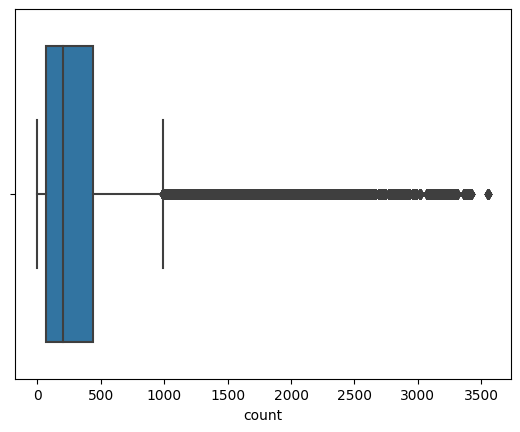

In [ ]:
sns.boxplot(x=data['count']);

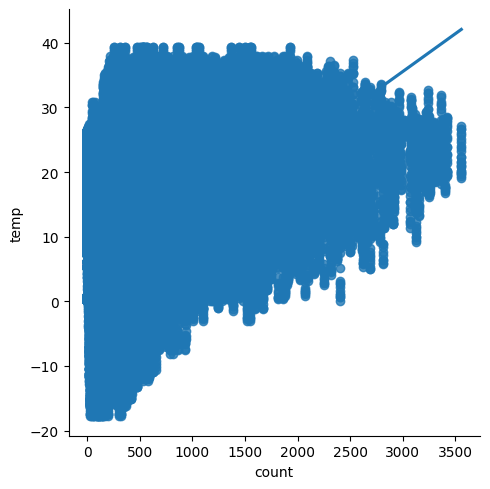

In [ ]:
sns.lmplot(x='count', y='temp', data=data)

<Axes: xlabel='season', ylabel='count'>

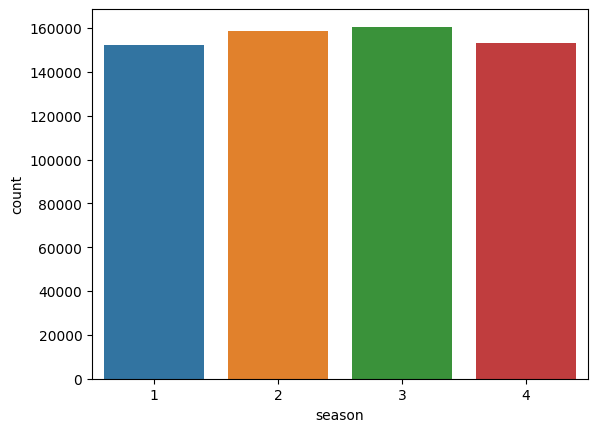

In [ ]:
sns.countplot(x='season', data=data)

In [ ]:
import plotly.express as ex

ex.pie(data, names='workingday', title='Work Day Distributions', hole=0.20)

In [ ]:
fig = ex.pie(data, names='holiday', title='HoliDay Distributions', color_discrete_sequence=ex.colors.sequential.RdBu)
fig.show()

<Axes: xlabel='temp', ylabel='Count'>

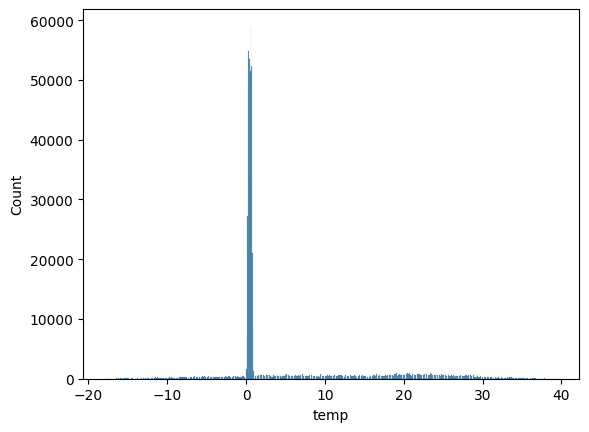

In [ ]:
sns.histplot(x='temp', data=data)

<Axes: xlabel='windspeed', ylabel='Count'>

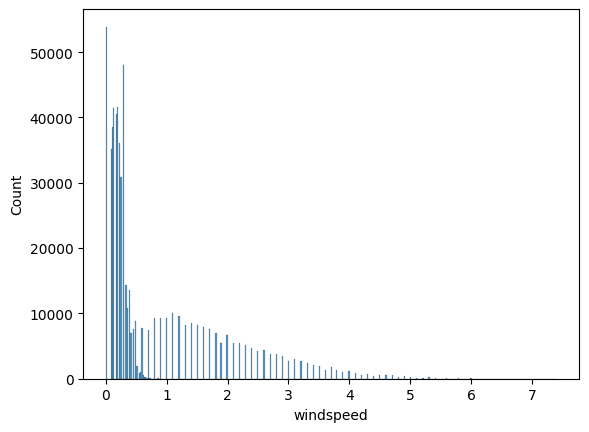

In [ ]:
sns.histplot(x='windspeed', data=data)

<Axes: >

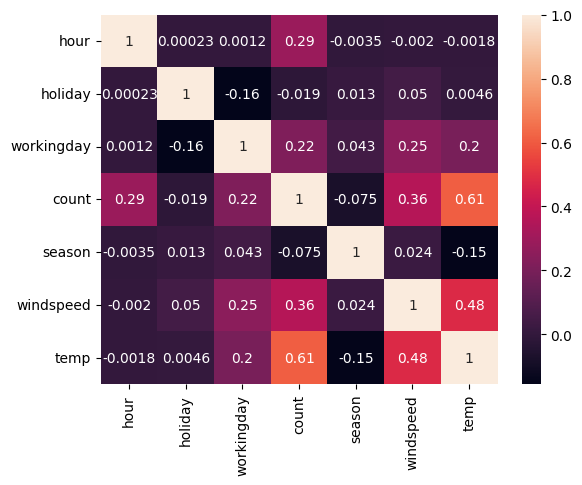

In [ ]:
# calculate the correlation matrix on the numeric columns
corr = data.select_dtypes('number').corr()

# plot the heatmap
sns.heatmap(corr, annot=True)

# Implementing Machine Learning Algorithms

train and Apply algorithms : you can use the muller loop

classify: Muller, at least 5 algos Regression: Muller, at least 7 algos Compare relevant tasks in the same table.

#FRACTAL CLUSTERING

In [ ]:
def plot_cluster(data3, max_loop=50):
    try:
        data3.drop('cluster', axis=1, inplace=True)
    except:
        next
    X = data3.iloc[:,1:]
    rb = RobustScaler()
    X_rb = rb.fit_transform(X)

    sse_within_cluster = {}
    silhouette_score = {}

    for k in range(2, max_loop):
        kmeans = KMeans(n_clusters=k,  random_state=10, n_init=10)
        kmeans.fit(X_rb)
        sse_within_cluster[k] = kmeans.inertia_
        silhouette_score[k] = metrics.silhouette_score(X_rb, kmeans.labels_, random_state=10)

    _ = plt.figure(figsize=(10,6))
    ax1 = plt.subplot(211)
    _ = plt.plot(list(sse_within_cluster.keys()), list(sse_within_cluster.values()))
    _ = plt.xlabel("Number of Clusters")
    _ = plt.ylabel("SSE Within Cluster")
    _ = plt.title("Within Cluster SSE After K-Means Clustering")
    _ = plt.xticks([i for i in range(2, max_loop)], rotation=75)

    ax2 = plt.subplot(212)
    _ = plt.plot(list(silhouette_score.keys()), list(silhouette_score.values()))
    _ = plt.xlabel("Number of Clusters")
    _ = plt.ylabel("Silhouette Score")
    _ = plt.title("Silhouette Score After K-Means Clustering")
    _ = plt.xticks([i for i in range(2, max_loop)], rotation=75)

    plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.5, wspace=0.35)


In [ ]:
def apply_cluster(df3, clusters=2):
    try:
        df3.drop('cluster', axis=1, inplace=True)
    except:
        next
    X = df3.iloc[:,1:]
    rb = RobustScaler()
    X_rb = rb.fit_transform(X)
    kmeans = KMeans(n_clusters=clusters, random_state=10, n_init=10)
    kmeans.fit(X_rb)
    score = metrics.silhouette_score(X_rb, kmeans.labels_, random_state=10)
    df3['cluster'] = kmeans.labels_
    sse_within_cluster = kmeans.inertia_

    print("clustering performance")
    print("#############################")
    print("silhouette score: " + str(score.round(2)))
    print("sse withing cluster: " + str(sse_within_cluster))

    return df3

Optimal Cluster  = 3

### First Iteration

In [ ]:
data = data.sample(frac=0.002) # remember to comment this
data.shape

(1249, 8)

In [ ]:
first_trial = apply_cluster(data, clusters=3)

clustering performance
#############################
silhouette score: 0.34
sse withing cluster: 4701.303232615894


In [ ]:
cluster_perf_df3 = first_trial.groupby('cluster')
cluster_perf_df3['cluster'].value_counts()

cluster  cluster
0        0          461
1        1          252
2        2          536
Name: cluster, dtype: int64

In [ ]:
colors = ['#DF2020', '#81DF20', '#2095DF']
first_trial['c'] = first_trial.cluster.map({0:colors[0], 1:colors[1], 2:colors[2]})
first_trial.head()

date  hour  holiday  workingday  count  season  windspeed  \
378820  2012-10-28    22        0           0     37       4   0.417900   
264439  2012-04-13     8        0           1    563       2   0.000000   
72630   2011-05-13    22        0           1    132       2   0.164200   
4816    2011-01-09    22        0           0     15       1   0.194000   
364796  2012-10-04    14        0           1    267       4   0.000000   

           temp  cluster        c  
378820 0.500000        2  #2095DF  
264439 0.500000        0  #DF2020  
72630  0.520000        0  #DF2020  
4816   0.080000        0  #DF2020  
364796 0.620000        2  #2095DF

### Second Iteration

In [ ]:
dataf3 = first_trial.query("cluster == 0").reset_index(drop=True).drop(['c'], axis=1)

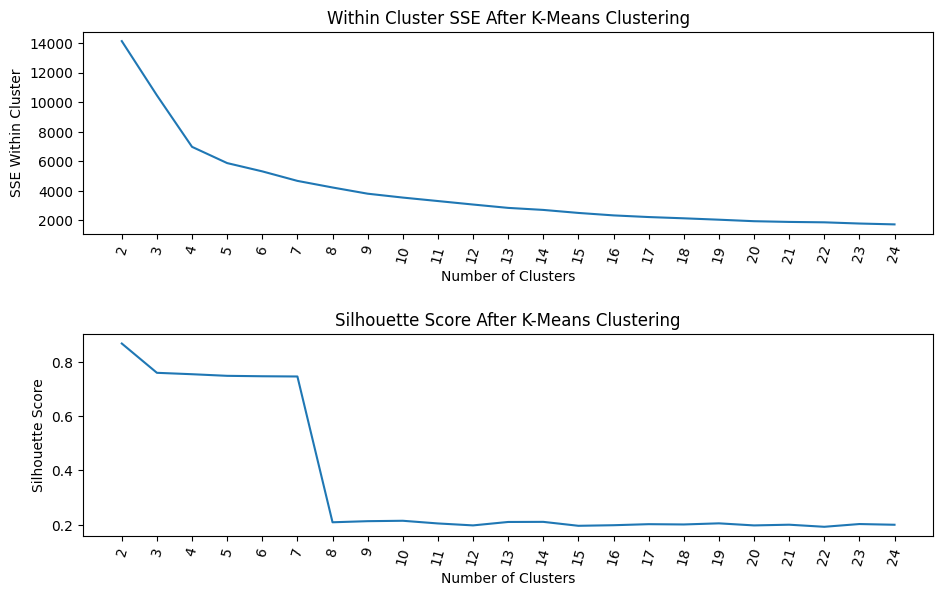

In [ ]:
plot_cluster(dataf3, max_loop=25)

**Optimal Cluster** is 3.

In [ ]:
second_trial= apply_cluster(dataf3, clusters=3)

clustering performance
#############################
silhouette score: 0.8
sse withing cluster: 4036.531903166041


In [ ]:
cluster_perf_df3 = second_trial.groupby('cluster')
cluster_perf_df3['cluster'].value_counts()

cluster  cluster
0        0           27
1        1          403
2        2           31
Name: cluster, dtype: int64

In [ ]:
colors = ['#FFFFFF', '#3cb44b','#FFFFFF']
second_trial['c'] = second_trial.cluster.map({0:colors[0], 1:colors[1], 2:colors[2]})
second_trial.head()

date  hour  holiday  workingday  count  season  windspeed     temp  \
0  2012-04-13     8        0           1    563       2   0.000000 0.500000   
1  2011-05-13    22        0           1    132       2   0.164200 0.520000   
2  2011-01-09    22        0           0     15       1   0.194000 0.080000   
3  2011-04-30     0        0           0    106       2   0.134300 0.540000   
4  2011-05-26    13        0           1    197       2   0.134300 0.640000   

   cluster        c  
0        1  #3cb44b  
1        1  #3cb44b  
2        1  #3cb44b  
3        1  #3cb44b  
4        1  #3cb44b

### Third Iteration

In [ ]:
dataf4 = second_trial.query("cluster == 1").reset_index(drop=True).drop(['c'], axis=1)

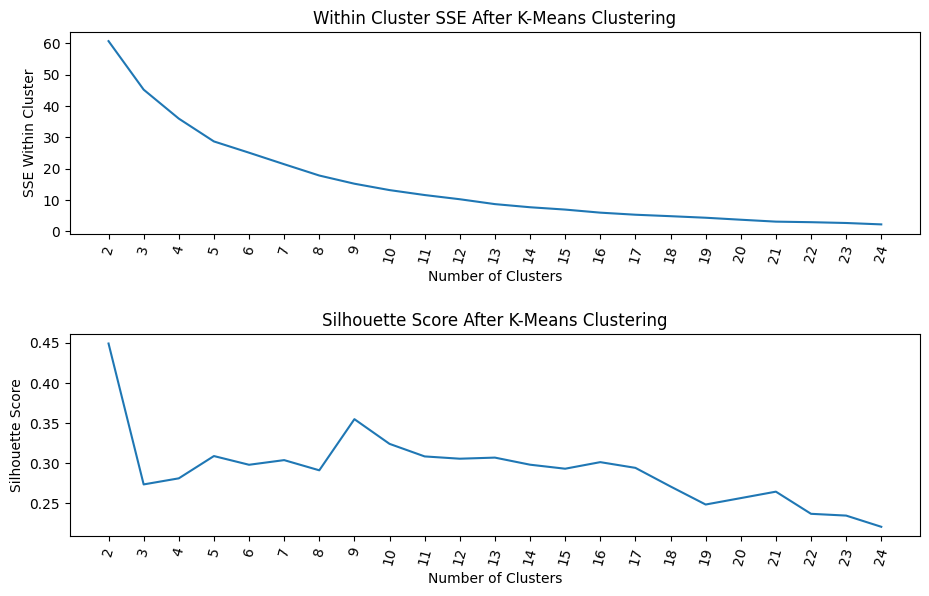

In [ ]:
plot_cluster(dataf4, max_loop=25)

**Optimal Cluster** is 3.

In [ ]:
third_trial = apply_cluster(dataf4, clusters=3)

clustering performance
#############################
silhouette score: 0.7
sse withing cluster: 1212.7833706135298


In [ ]:
cluster_perf_df3 = third_trial.groupby('cluster')
cluster_perf_df3['cluster'].value_counts()

cluster  cluster
0        0           11
1        1          391
2        2            1
Name: cluster, dtype: int64

In [ ]:
colors = ['#e6194b', '#3cb44b', '#2095DF' ]
third_trial['c'] = third_trial.cluster.map({0:colors[0], 1:colors[1], 2:colors[2]})
third_trial.head()

date  hour  holiday  workingday  count  season  windspeed     temp  \
0  2012-04-13     8        0           1    563       2   0.000000 0.500000   
1  2011-05-13    22        0           1    132       2   0.164200 0.520000   
2  2011-01-09    22        0           0     15       1   0.194000 0.080000   
3  2011-04-30     0        0           0    106       2   0.134300 0.540000   
4  2011-05-26    13        0           1    197       2   0.134300 0.640000   

   cluster        c  
0        1  #3cb44b  
1        1  #3cb44b  
2        1  #3cb44b  
3        1  #3cb44b  
4        1  #3cb44b

In [ ]:
cluster_perf_df3['cluster'].value_counts()

cluster  cluster
0        0           11
1        1          391
2        2            1
Name: cluster, dtype: int64

In [ ]:
golden_cluster_df = third_trial.query("cluster == 1").reset_index(drop=True).drop(['c'], axis=1)

In [ ]:
golden_cluster_df.head()

date  hour  holiday  workingday  count  season  windspeed     temp  \
0  2012-04-13     8        0           1    563       2   0.000000 0.500000   
1  2011-05-13    22        0           1    132       2   0.164200 0.520000   
2  2011-01-09    22        0           0     15       1   0.194000 0.080000   
3  2011-04-30     0        0           0    106       2   0.134300 0.540000   
4  2011-05-26    13        0           1    197       2   0.134300 0.640000   

   cluster  
0        1  
1        1  
2        1  
3        1  
4        1

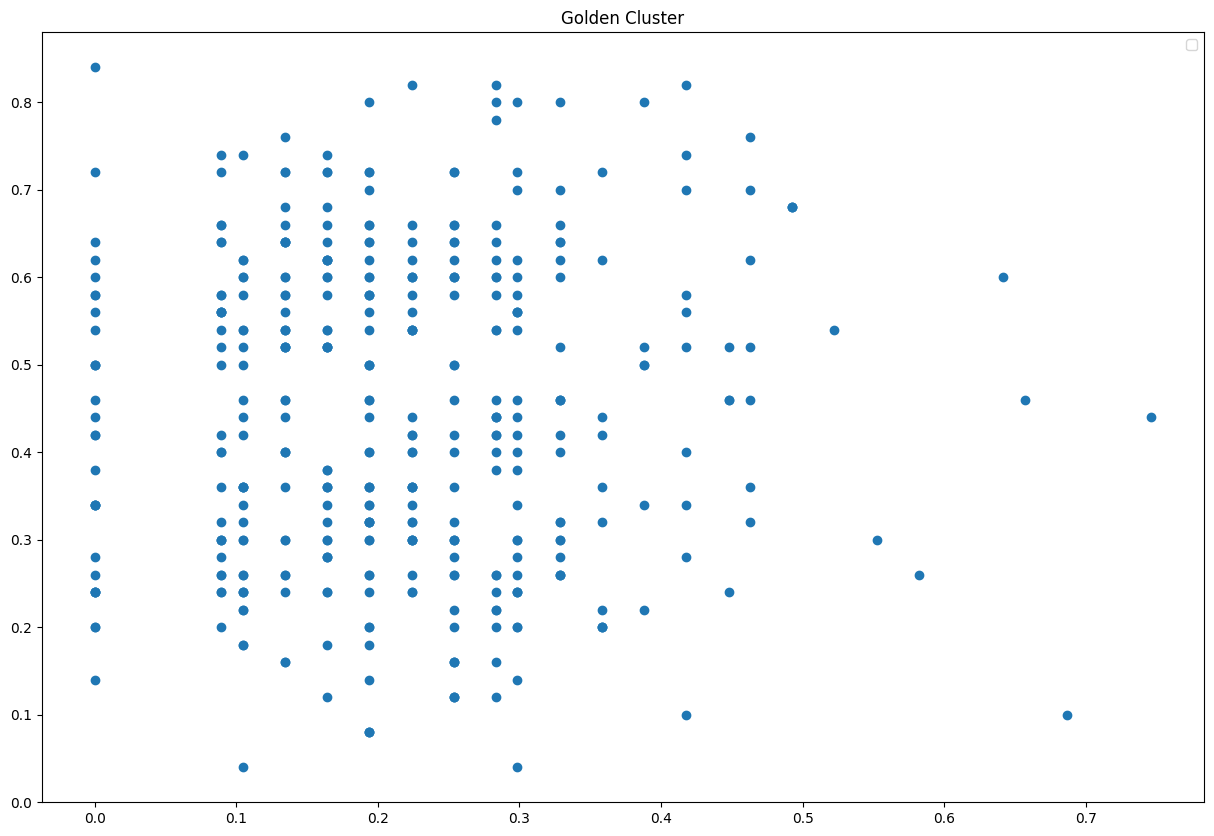

In [ ]:
plt.figure(figsize=(15,10))
plt.scatter(golden_cluster_df.windspeed, golden_cluster_df.temp, cmap='rainbow')
plt.title('Golden Cluster')
plt.legend()
plt.show()

# Agglomerative Clustering

## Applying Agglomerative Clustering and plot

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1249 entries, 588204 to 227860
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   date        1249 non-null   object 
 1   hour        1249 non-null   int64  
 2   holiday     1249 non-null   int64  
 3   workingday  1249 non-null   int64  
 4   count       1249 non-null   int64  
 5   season      1249 non-null   int64  
 6   windspeed   1249 non-null   float64
 7   temp        1249 non-null   float64
 8   cluster     1249 non-null   int32  
 9   c           1249 non-null   object 
dtypes: float64(2), int32(1), int64(5), object(2)
memory usage: 102.5+ KB


Agglomerative Clustering Using Ward Method
[0 1 0 ... 0 1 0]


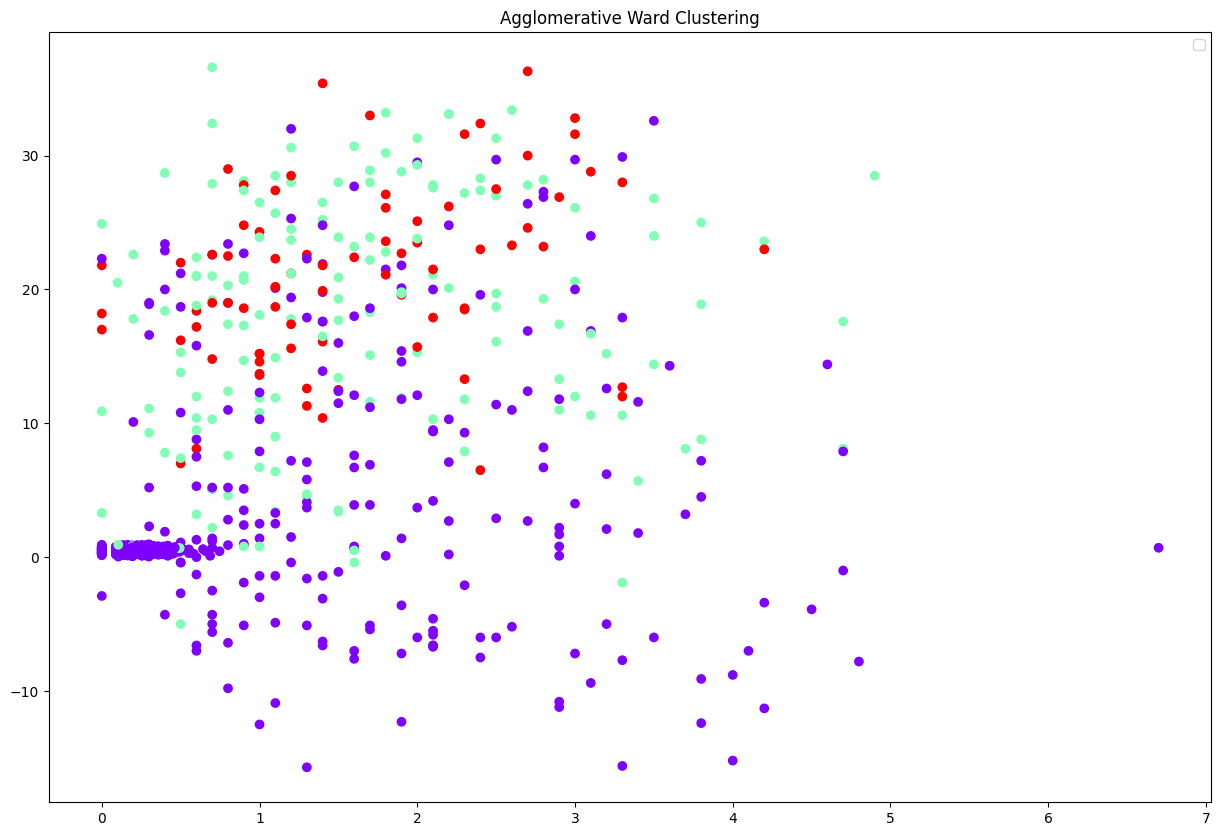

In [ ]:
plt.figure(figsize=(15,10))
d1 = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
agglo_pred = d1.fit_predict(data.drop(["date", "c"], axis=1))
cluster_labels = d1.labels_
print('Agglomerative Clustering Using Ward Method')
print(agglo_pred)

plt.scatter(data.windspeed, data.temp, c=d1.labels_, cmap='rainbow')
plt.title('Agglomerative Ward Clustering')
# plt.xticks([i for i in range(0, 5)], rotation=360)
# plt.yticks([i for i in range(0, 5)], rotation=360)
plt.legend()
plt.show()

## Silhouette Score

In [ ]:
score = metrics.silhouette_score(data.drop(["date", "c"], axis=1), cluster_labels, metric='euclidean', random_state=10)
print("silhouette score: " + str(score.round(2)))

silhouette score: 0.69


# DBSCAN

## Scaling

In [ ]:
Sc = StandardScaler()
X = Sc.fit_transform(data.drop(["date", "c"], axis=1))

## PCA for dimensionality reduction

[[-1.62974791  0.83654475]
 [ 0.03844446 -1.07698125]
 [-0.12285769 -1.2034029 ]
 ...
 [-1.39148494  1.5009475 ]
 [ 1.38406763 -0.71592689]
 [-1.11721077 -1.79544469]]


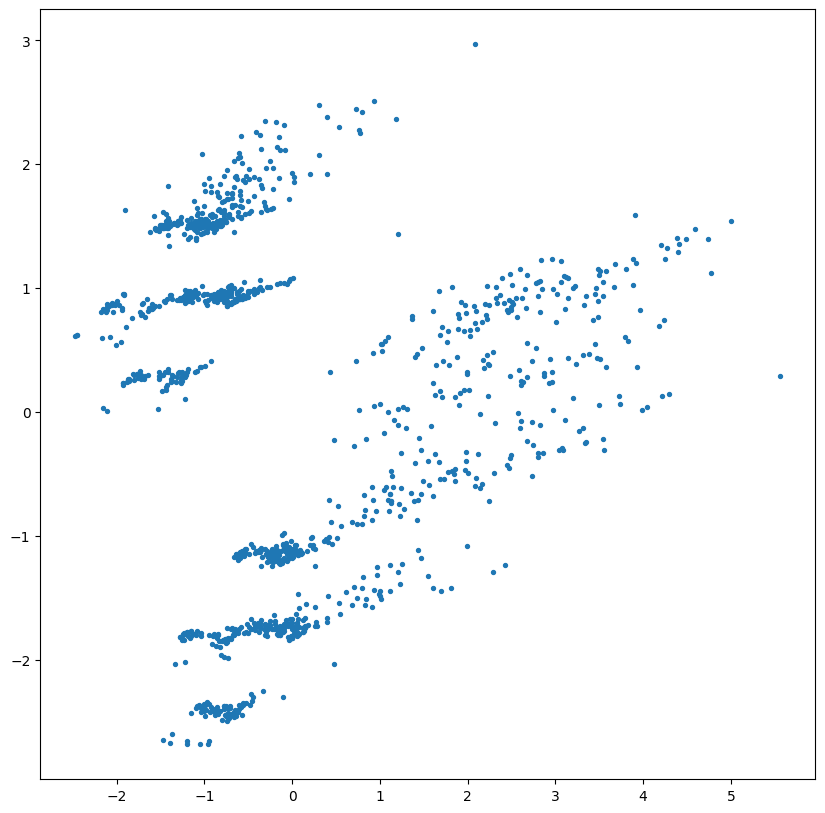

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
vis = pca.fit_transform(X)
print(vis)
plt.figure(figsize=(10,10))
plt.scatter(vis[:,0], vis[:, 1], s=8)

## Applying DBSCAN

Silhouette Coefficient: 0.103


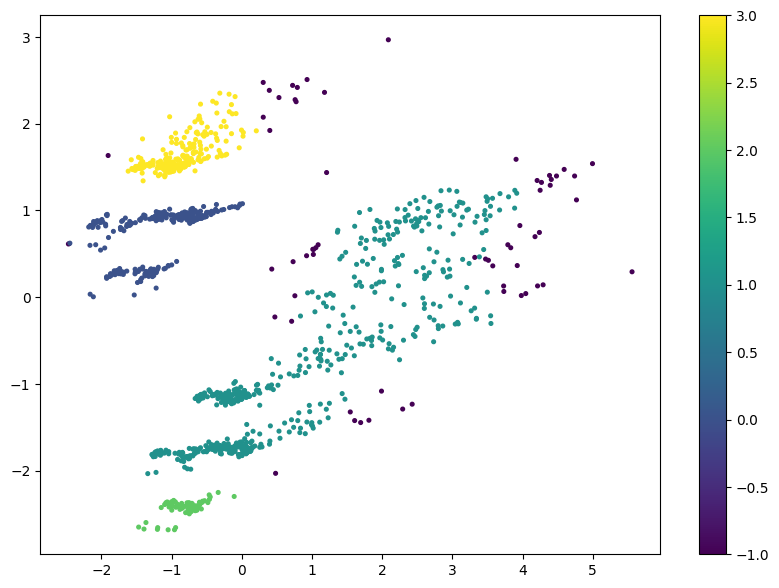

In [ ]:
# Compute DBSCAN
db = DBSCAN(eps=0.3, min_samples=10).fit(vis)
plt.figure(figsize=(10,7))
dbsc_labels=db.labels_
plt.scatter(vis[:,0], vis[:, 1], s=7, c=dbsc_labels)
plt.colorbar()
print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(X, dbsc_labels))

In [ ]:
pd.Series(db.labels_).value_counts()

 1    585
 0    285
 3    237
 2     79
-1     63
dtype: int64

# Spectral Clustering

In [ ]:
def plot_cluster_spectral(df3, max_loop=50):
    try:
        df3.drop('cluster', axis=1, inplace=True)
    except:
        next
    X3 = df3.iloc[:,1:].values
    rb = RobustScaler()
    X3_rb = rb.fit_transform(X)

    silhouette_score = {}

    for k in range(2, max_loop):
        cluster_labels = SpectralClustering(n_clusters=k, assign_labels='discretize', random_state=10, affinity='rbf').fit_predict(X3_rb)
        silhouette_score[k] = metrics.silhouette_score(X3_rb, cluster_labels, random_state=10)

    ax2 = plt.subplot(212)
    _ = plt.plot(list(silhouette_score.keys()), list(silhouette_score.values()))
    _ = plt.xlabel("Number of Clusters")
    _ = plt.ylabel("Silhouette Score")
    _ = plt.title("Silhouette Score After Spectral Clustering")
    _ = plt.xticks([i for i in range(2, max_loop)], rotation=75)

    plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.5, wspace=0.35)

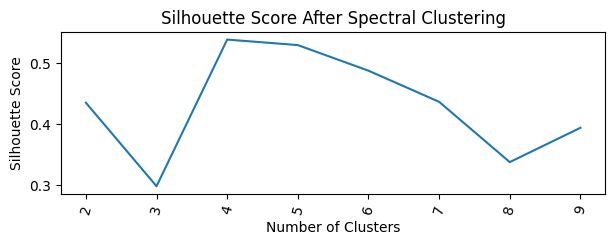

In [ ]:
plot_cluster_spectral(data, 10)

**Comparing the Silhoeutte Scores, it can be found that Agglomerative Clustering is best suited for this modelling.**

# Applying Agglomerative clustering with fractal distance

In [ ]:
def fractal_distance(p1, p2):
  x1, y1, x2, y2 = p1[0],p1[1], p2[0], p2[1]
  num_divisions = 10
  # Create a grid with num_divisions x num_divisions boxes
  x = np.linspace(min(x1, x2), max(x1, x2), num_divisions + 1)
  y = np.linspace(min(y1, y2), max(y1, y2), num_divisions + 1)
  grid = np.zeros((num_divisions, num_divisions))

  # Place a point at each of the two endpoints
  x1_idx = np.argmin(np.abs(x - x1)) - 1
  y1_idx = np.argmin(np.abs(y - y1)) - 1
  grid[y1_idx, x1_idx] = 1
  x2_idx = np.argmin(np.abs(x - x2)) - 1
  y2_idx = np.argmin(np.abs(y - y2)) - 1
  grid[y2_idx, x2_idx] = 1

  # Count the number of boxes that contain at least one point
  num_boxes_with_points = 0
  for i in range(num_divisions):
    for j in range(num_divisions):
      if np.sum(grid[i:i+2, j:j+2]) > 0:
        num_boxes_with_points += 1

  # Calculate the fractal dimension and use it to estimate the length of the path
  fractal_dim = np.log(num_boxes_with_points) / np.log(2)
  fractal_length = (2 ** fractal_dim) * ((x2 - x1) ** 2 + (y2 - y1) ** 2) ** 0.5
  return fractal_length

In [ ]:
def plot_cluster_agglo(df3, max_loop=50):
    try:
        df3.drop('cluster', axis=1, inplace=True)
    except:
        next
    XX = df3.iloc[:,1:].values
    rb = RobustScaler()
    XX_rb = rb.fit_transform(XX)

    def sim_affinity(XX):
      return metrics.pairwise_distances(XX, metric=fractal_distance)

    silhouette_score = {}

    for k in range(2, max_loop):
        instance = AgglomerativeClustering(n_clusters=k, affinity=sim_affinity, linkage='average')
        instance.fit_predict(XX_rb)
        cluster_labels = instance.labels_
        silhouette_score[k] = metrics.silhouette_score(XX_rb, cluster_labels, random_state=10)

    _ = plt.figure(figsize=(10,6))

    ax1 = plt.subplot(212)
    _ = plt.plot(list(silhouette_score.keys()), list(silhouette_score.values()))
    _ = plt.xlabel("Number of Clusters")
    _ = plt.ylabel("Silhouette Score")
    _ = plt.title("Silhouette Score After Agglomerative Clustering")
    _ = plt.xticks([i for i in range(2, max_loop)], rotation=75)

    plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.5, wspace=0.35)


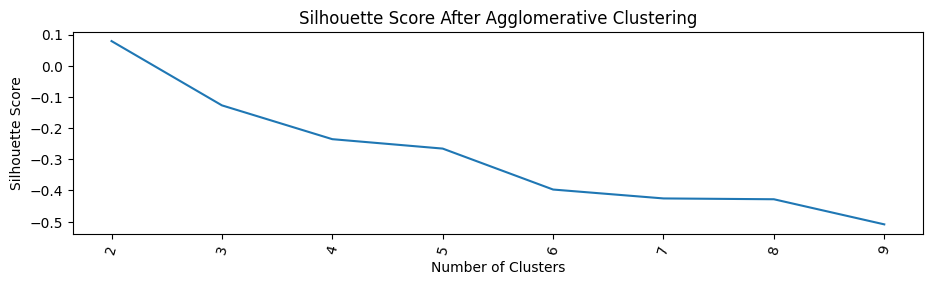

In [ ]:
plot_cluster_agglo(data.drop(["date", "c"], axis=1), 10)

In [ ]:
def apply_cluster_agglo(df3, clusters=2):
    try:
        df3.drop('cluster', axis=1, inplace=True)
    except:
        next
    XX = df3.iloc[:,1:]
    rb = RobustScaler()
    XX_rb = rb.fit_transform(XX)
    def sim_affinity(XX):
      return metrics.pairwise_distances(XX, metric=fractal_distance)

    instance = AgglomerativeClustering(n_clusters=clusters, affinity=sim_affinity, linkage='average')
    instance.fit_predict(XX_rb)
    score = metrics.silhouette_score(XX_rb, instance.labels_, random_state=10)
    df3['cluster'] = instance.labels_
    # sse_within_cluster = kmeans.inertia_

    print("clustering performance")
    print("######################")
    print("silhouette score: " + str(score.round(2)))

    return df3

# Fractal Clustering on Best performing algorithm

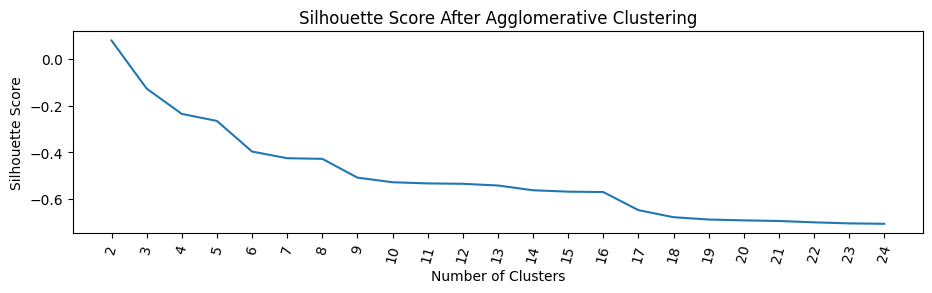

In [ ]:
plot_cluster_agglo(data.drop(["date", "c"], axis=1), 25)

In [ ]:
first_trial_agglo = apply_cluster_agglo(data.drop(["date", "c"], axis=1), clusters=3)

In [ ]:
cluster_df_agglo = first_trial_agglo.groupby('cluster')
cluster_df_agglo['cluster'].value_counts()

cluster  cluster
0        0           45
1        1          940
2        2          264
Name: cluster, dtype: int64

In [ ]:
colors = ['#DF2020', '#81DF20', '#2095DF']
first_trial_agglo['c'] = first_trial_agglo.cluster.map({0:colors[0], 1:colors[1], 2:colors[2]})
first_trial_agglo.head()

hour  holiday  workingday  count  season  windspeed     temp  cluster  \
616370    11        0           1    834       1   0.600000 7.800000        1   
352023     9        0           1    328       3   0.134300 0.620000        1   
23795     20        0           1    101       1   0.253700 0.260000        1   
291087    14        0           1    238       2   0.522400 0.700000        1   
362501    14        0           0    612       4   0.164200 0.580000        2   

              c  
616370  #81DF20  
352023  #81DF20  
23795   #81DF20  
291087  #81DF20  
362501  #2095DF

In [ ]:
dataf5 = first_trial_agglo.query("cluster == 2").reset_index(drop=True).drop(['c',], axis=1)
dataf5.head()

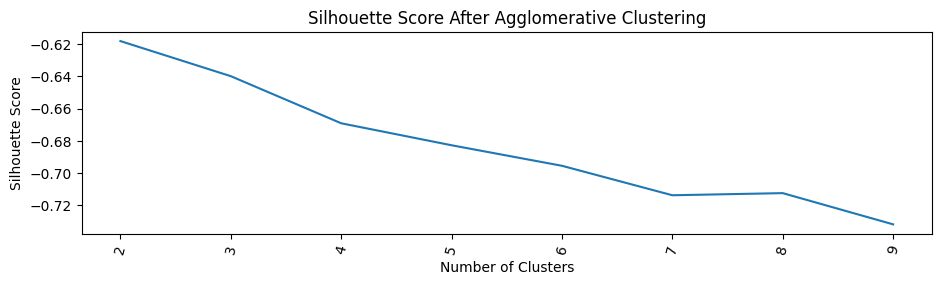

In [ ]:
plot_cluster_agglo(dataf5,10)

In [ ]:
second_trial_agglo= apply_cluster_agglo(dataf5, clusters=3)

In [ ]:
cluster_df3_agglo2 = second_trial_agglo.groupby('cluster')
cluster_df3_agglo2['cluster'].value_counts()

cluster  cluster
0        0          262
1        1            1
2        2            1
Name: cluster, dtype: int64

In [ ]:
colors = ['#FFFFFF', '#3cb44b','#FFFFFF']
second_trial_agglo['c'] = second_trial_agglo.cluster.map({0:colors[0], 1:colors[1], 2:colors[2]})
second_trial_agglo.head()

hour  holiday  workingday  count  season  windspeed     temp  cluster  \
0    14        0           0    612       4   0.164200 0.580000        0   
1    20        0           0    179       4   0.552200 0.580000        0   
2    14        0           0    106       1   0.089600 0.240000        0   
3     5        0           0      4       1   0.223900 0.240000        0   
4     7        0           0     84       4   0.104500 0.700000        0   

         c  
0  #FFFFFF  
1  #FFFFFF  
2  #FFFFFF  
3  #FFFFFF  
4  #FFFFFF

#Latent Variables and Manifolds


## Importing another dataset for Latent Variables

In [ ]:
url6 ='https://drive.google.com/uc?id=1ZAfGX3pJ5rr5ZIldC4gEbgG4Vb5jBDiA' # data1.csv -> "https://drive.google.com/file/d/10wKdg9HnqQ_o9UZatlAsTMfiIpg8NtMq/view?usp=drive_link"
weather1 = pd.read_csv(url6)
temperature = pd.read_csv("weather.csv").iloc[:4998]
temperature.head(10)

date  season  windspeed     temp
0  2011-01-01       1   0.000000 0.240000
1  2011-01-01       1   0.000000 0.220000
2  2011-01-01       1   0.000000 0.220000
3  2011-01-01       1   0.000000 0.240000
4  2011-01-01       1   0.000000 0.240000
5  2011-01-01       1   0.089600 0.240000
6  2011-01-01       1   0.000000 0.220000
7  2011-01-01       1   0.000000 0.200000
8  2011-01-01       1   0.000000 0.240000
9  2011-01-01       1   0.000000 0.320000

In [ ]:
temperature.shape

(4998, 4)

In [ ]:
temperature['season'].unique()

array([1, 2, 3])

### Train Test Split

In [ ]:
x_v0 = data.drop(["date", "count", "c"], axis=1)
y_v0 = data["count"]
x_v0.head()

hour  holiday  workingday  season  windspeed     temp  cluster
378820    22        0           0       4   0.417900 0.500000        2
264439     8        0           1       2   0.000000 0.500000        0
72630     22        0           1       2   0.164200 0.520000        0
4816      22        0           0       1   0.194000 0.080000        0
364796    14        0           1       4   0.000000 0.620000        2

In [ ]:
x_v0.shape, y_v0.shape

((1249, 7), (1249,))

In [ ]:
x_trainv0, x_testv0, y_trainv0, y_testv0 = train_test_split(x_v0, y_v0, test_size=0.25, random_state=12)

Dataset-1

In [ ]:
x_v0_1 = data1.drop(["date", "count"], axis=1)
y_v0_1 = data1["count"]
x_v0_1.head()

hour  season  holiday  workingday  windspeed     temp
0     0       1        0           0   0.000000 0.240000
1     1       1        0           0   0.000000 0.220000
2     2       1        0           0   0.000000 0.220000
3     3       1        0           0   0.000000 0.240000
4     4       1        0           0   0.000000 0.240000

In [ ]:
x_v0_1.shape, y_v0_1.shape

((17379, 6), (17379,))

In [ ]:
x_trainv0_1, x_testv0_1, y_trainv0_1, y_testv0_1 = train_test_split(x_v0_1, y_v0_1, test_size=0.25, random_state=12)

Dataset - 2

In [ ]:
x_v0_2 = data2.drop(["date", "count"], axis=1)
y_v0_2 = data2["count"]
x_v0_2.head()

hour  season  holiday  workingday  windspeed      temp
0     0       4        0           1   2.200000 -5.200000
1     1       4        0           1   0.800000 -5.500000
2     2       4        0           1   1.000000 -6.000000
3     3       4        0           1   0.900000 -6.200000
4     4       4        0           1   2.300000 -6.000000

In [ ]:
x_v0_2.shape, y_v0_2.shape

((8760, 6), (8760,))

In [ ]:
x_trainv0_2, x_testv0_2, y_trainv0_2, y_testv0_2 = train_test_split(x_v0_2, y_v0_2, test_size=0.25, random_state=12)

Mix of `season` as latent variable 1

In [ ]:
x_v1 = data.drop(["date", "count", "c"], axis=1)
x_v1["season"] = temperature.season
y_v1 = data["count"]


In [ ]:
x_v1.shape, y_v1.shape

((1249, 7), (1249,))

In [ ]:
x_trainv1, x_testv1, y_trainv1, y_testv1 = train_test_split(x_v1, y_v1, test_size=0.25, random_state=12)

Mix of `windspeed` as latent variable 2

In [ ]:
x_v2 = data.drop(["date", "count", "c"], axis=1)
x_v2["windspeed"] = temperature.season
y_v2 = data["count"]


In [ ]:
x_v2.shape, y_v2.shape

((1249, 7), (1249,))

In [ ]:
x_trainv2, x_testv2, y_trainv2, y_testv2 = train_test_split(x_v2, y_v2, test_size=0.25, random_state=12)

Mix of `temp` as latent variable 3

In [ ]:
x_v3 = data.drop(["date", "count", "c"], axis=1)
x_v3["temp"] = temperature.season
y_v3 = data["count"]
x_v3.head()

hour  holiday  workingday  season  windspeed     temp  cluster
378820    22        0           0       4   0.417900      NaN        2
264439     8        0           1       2   0.000000      NaN        0
72630     22        0           1       2   0.164200      NaN        0
4816      22        0           0       1   0.194000 3.000000        0
364796    14        0           1       4   0.000000      NaN        2

In [ ]:
x_v3.shape, y_v3.shape

((1249, 7), (1249,))

In [ ]:
x_trainv3, x_testv3, y_trainv3, y_testv3 = train_test_split(x_v3, y_v3, test_size=0.25, random_state=12)

# Muller Loop

### Muller Loop Function

In [ ]:
def muller_loop(x_train, x_test, y_train, y_test):
  max_score = 0.0
  max_class = ''
  # iterate over classifiers
  metrics_df = pd.DataFrame({
      'Classifier': [],
      'MSE' : [],
      'MAE': [],
      'RSquared': [],
      'Test Accuracy': []
      })
  for name, clf in zip(names, classifiers):
      clf.fit(x_train, y_train)
      y_pred = clf.predict(x_test)
      score = 100.0 * clf.score(x_test, y_test)
      mean_absolute_error = np.round(metrics.mean_absolute_error(y_test, y_pred), 2)
      mean_squared_error = np.round(metrics.mean_squared_error(y_test, y_pred), 2)
      r_squared = np.round(metrics.r2_score(y_test, y_pred), 2)

      new_row = pd.DataFrame({
      'Classifier': name,
      'MSE' : mean_absolute_error,
      'MAE': mean_squared_error,
      'RSquared': r_squared,
      'Test Accuracy': score}, index=[0])
      metrics_df = pd.concat([new_row,metrics_df.loc[:]]).reset_index(drop=True)

      print('Classifier = %s, Score (test, accuracy) = %.2f,' %(name, score))
      if score > max_score:
          clf_best = clf
          max_score = score
          max_class = name

  print('Best --> Classifier = %s, Score (test, accuracy) = %.2f' %(max_class, max_score))
  return metrics_df

# Metrics

Dataset - 1

In [ ]:
nlv_metrics_df = muller_loop(x_trainv0_1, x_testv0_1, y_trainv0_1, y_testv0_1)
nlv_metrics_df

Classifier = Linear Regression, Score (test, accuracy) = 29.71,
Classifier = MLP Regressor, Score (test, accuracy) = 57.80,
Classifier = RandomForest Regressor, Score (test, accuracy) = 58.19,
Classifier = Gradient Boosting Regressor, Score (test, accuracy) = 77.20,
Classifier = KNeighbors Regressor, Score (test, accuracy) = 72.09,
Best --> Classifier = Gradient Boosting Regressor, Score (test, accuracy) = 77.20


Classifier        MSE          MAE  RSquared  \
0         KNeighbors Regressor  61.670000  9524.960000  0.720000   
1  Gradient Boosting Regressor  59.520000  7781.570000  0.770000   
2       RandomForest Regressor  79.020000 14267.090000  0.580000   
3                MLP Regressor  77.650000 14402.430000  0.580000   
4            Linear Regression 114.460000 23985.330000  0.300000   

   Test Accuracy  
0      72.088178  
1      77.196982  
2      58.191882  
3      57.795308  
4      29.713679

Dataset-2

In [ ]:
nlv_metrics_df = muller_loop(x_trainv0_2, x_testv0_2, y_trainv0_2, y_testv0_2)
nlv_metrics_df

Classifier = Linear Regression, Score (test, accuracy) = 48.54,
Classifier = MLP Regressor, Score (test, accuracy) = 57.49,
Classifier = RandomForest Regressor, Score (test, accuracy) = 64.16,
Classifier = Gradient Boosting Regressor, Score (test, accuracy) = 72.47,
Classifier = KNeighbors Regressor, Score (test, accuracy) = 61.35,
Best --> Classifier = Gradient Boosting Regressor, Score (test, accuracy) = 72.47


Classifier        MSE           MAE  RSquared  \
0         KNeighbors Regressor 246.390000 160097.900000  0.610000   
1  Gradient Boosting Regressor 216.510000 114044.940000  0.720000   
2       RandomForest Regressor 249.410000 148476.580000  0.640000   
3                MLP Regressor 293.500000 176087.520000  0.570000   
4            Linear Regression 340.900000 213193.290000  0.490000   

   Test Accuracy  
0      61.353514  
1      72.470368  
2      64.158817  
3      57.493734  
4      48.536668

### Dataset 1+2

In [ ]:
nlv_metrics_df = muller_loop(x_trainv0, x_testv0, y_trainv0, y_testv0)
nlv_metrics_df

Classifier = Linear Regression, Score (test, accuracy) = 53.97,
Classifier = MLP Regressor, Score (test, accuracy) = 62.28,
Classifier = RandomForest Regressor, Score (test, accuracy) = 69.02,
Classifier = Gradient Boosting Regressor, Score (test, accuracy) = 71.24,
Classifier = KNeighbors Regressor, Score (test, accuracy) = 47.40,
Best --> Classifier = Gradient Boosting Regressor, Score (test, accuracy) = 71.24


Classifier        MSE           MAE  RSquared  \
0         KNeighbors Regressor 190.360000 136388.960000  0.470000   
1  Gradient Boosting Regressor 164.920000  74587.900000  0.710000   
2       RandomForest Regressor 177.710000  80341.240000  0.690000   
3                MLP Regressor 208.010000  97804.830000  0.620000   
4            Linear Regression 231.300000 119353.580000  0.540000   

   Test Accuracy  
0      47.402378  
1      71.235602  
2      69.016861  
3      62.282128  
4      53.971973

### With Latent Variable 1:

In [ ]:
x_trainv1.fillna(0, inplace=True)
x_testv1.fillna(0, inplace=True)
y_trainv1.fillna(0, inplace=True)
y_testv1.fillna(0, inplace=True)

In [ ]:
nwi_metrics_df = muller_loop(x_trainv1, x_testv1, y_trainv1, y_testv1)
nwi_metrics_df

Classifier = Linear Regression, Score (test, accuracy) = 53.16,
Classifier = MLP Regressor, Score (test, accuracy) = 62.79,
Classifier = RandomForest Regressor, Score (test, accuracy) = 68.76,
Classifier = Gradient Boosting Regressor, Score (test, accuracy) = 69.91,
Classifier = KNeighbors Regressor, Score (test, accuracy) = 50.60,
Best --> Classifier = Gradient Boosting Regressor, Score (test, accuracy) = 69.91


Classifier        MSE           MAE  RSquared  \
0         KNeighbors Regressor 189.110000 128100.530000  0.510000   
1  Gradient Boosting Regressor 169.290000  78019.330000  0.700000   
2       RandomForest Regressor 178.040000  80997.080000  0.690000   
3                MLP Regressor 204.670000  96479.010000  0.630000   
4            Linear Regression 232.080000 121470.830000  0.530000   

   Test Accuracy  
0      50.598762  
1      69.912292  
2      68.763940  
3      62.793422  
4      53.155468

### With Latent Variable 2:

In [ ]:
x_trainv2.fillna(0, inplace=True)
x_testv2.fillna(0, inplace=True)
y_trainv2.fillna(0, inplace=True)
y_testv2.fillna(0, inplace=True)

In [ ]:
met_metrics_df = muller_loop(x_trainv2, x_testv2, y_trainv2, y_testv2)
met_metrics_df

Classifier = Linear Regression, Score (test, accuracy) = 53.42,
Classifier = MLP Regressor, Score (test, accuracy) = 62.18,
Classifier = RandomForest Regressor, Score (test, accuracy) = 69.48,
Classifier = Gradient Boosting Regressor, Score (test, accuracy) = 69.55,
Classifier = KNeighbors Regressor, Score (test, accuracy) = 44.94,
Best --> Classifier = Gradient Boosting Regressor, Score (test, accuracy) = 69.55


Classifier        MSE           MAE  RSquared  \
0         KNeighbors Regressor 198.520000 142770.770000  0.450000   
1  Gradient Boosting Regressor 162.900000  78962.620000  0.700000   
2       RandomForest Regressor 177.420000  79135.860000  0.690000   
3                MLP Regressor 205.810000  98080.710000  0.620000   
4            Linear Regression 235.500000 120777.620000  0.530000   

   Test Accuracy  
0      44.941269  
1      69.548517  
2      69.481707  
3      62.175735  
4      53.422802

### With Latent Variables 3

In [ ]:
x_trainv3.fillna(0, inplace=True)
x_testv3.fillna(0, inplace=True)
y_trainv3.fillna(0, inplace=True)
y_testv3.fillna(0, inplace=True)

In [ ]:
met_nwi_metrics_df = muller_loop(x_trainv3, x_testv3, y_trainv3, y_testv3)
met_nwi_metrics_df

Classifier = Linear Regression, Score (test, accuracy) = 24.96,
Classifier = MLP Regressor, Score (test, accuracy) = 25.50,
Classifier = RandomForest Regressor, Score (test, accuracy) = 59.44,
Classifier = Gradient Boosting Regressor, Score (test, accuracy) = 67.09,
Classifier = KNeighbors Regressor, Score (test, accuracy) = 62.82,
Best --> Classifier = Gradient Boosting Regressor, Score (test, accuracy) = 67.09


Classifier        MSE           MAE  RSquared  \
0         KNeighbors Regressor 175.820000  96405.980000  0.630000   
1  Gradient Boosting Regressor 170.590000  85349.110000  0.670000   
2       RandomForest Regressor 187.120000 105180.350000  0.590000   
3                MLP Regressor 300.960000 193179.790000  0.260000   
4            Linear Regression 302.610000 194594.420000  0.250000   

   Test Accuracy  
0      62.821583  
1      67.085605  
2      59.437800  
3      25.501319  
4      24.955773

# Decision Tree for Classification

## Gini Scores

#### Build a full decision tree model on a train dataset using 'entropy'.

In [ ]:
xc = data.drop(['date', 'c', 'holiday'], axis=1)
yc = data.holiday
xc_train, xc_test, yc_train, yc_test = train_test_split(xc, yc, test_size=0.9)
xc_train.shape, yc_train.shape, xc_test.shape, yc_test.shape

((124, 7), (124,), (1125, 7), (1125,))

In [ ]:
decision_tree_classifier = DecisionTreeClassifier(criterion = 'gini', random_state = 10, max_depth=3)
decision_tree = decision_tree_classifier.fit(xc_train, yc_train)

In [ ]:
import pydotplus
from sklearn import tree
from IPython.display import Image
from sklearn.tree import export_graphviz

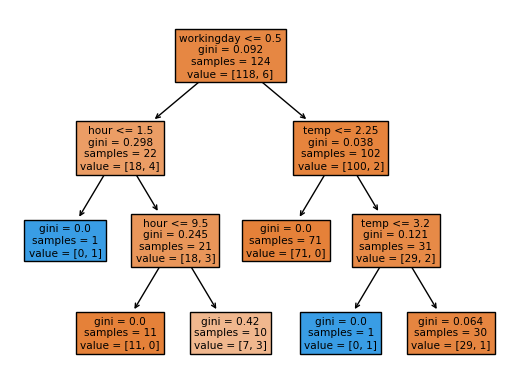

In [ ]:
labels = xc_train.columns
dot_data = tree.plot_tree(decision_tree, filled=True, feature_names=labels)

The lesser the gini score, more important the feature is. Here, we can see room_num being one above all.

**Calculate performance measures on the train set.**

In [ ]:
def get_train_report(model):
    train_pred = model.predict(xc_train)
    return(classification_report(yc_train, train_pred))

In [ ]:
train_report = get_train_report(decision_tree)
print(train_report)

              precision    recall  f1-score   support

           0       0.97      1.00      0.98       118
           1       1.00      0.33      0.50         6

    accuracy                           0.97       124
   macro avg       0.98      0.67      0.74       124
weighted avg       0.97      0.97      0.96       124



In [ ]:
def get_test_report(model):
    test_pred = model.predict(xc_test)
    report = classification_report(yc_test, test_pred)
    return(report, test_pred)

In [ ]:
test_report_dt, yc_pred_dt= get_test_report(decision_tree)

In [ ]:
print('y_pred:',  yc_pred_dt)

y_pred: [0 0 0 ... 0 0 0]


In [ ]:
print(test_report_dt)

              precision    recall  f1-score   support

           0       0.97      0.97      0.97      1089
           1       0.07      0.06      0.06        36

    accuracy                           0.94      1125
   macro avg       0.52      0.51      0.52      1125
weighted avg       0.94      0.94      0.94      1125



Huperparameter tuning to resolve overfitting

In [ ]:
tree_param_grid = {'criterion' :'gini',
'max_depth' :5,
'min_samples_split' : 4,
'max_leaf_nodes' : 6,
'random_state' : 10}

In [ ]:
dt_model = DecisionTreeClassifier(criterion = 'gini',
                                  max_depth = 5,
                                  min_samples_split = 4,
                                  max_leaf_nodes = 6,
                                  random_state = 10)

decision_tree = dt_model.fit(xc_train, yc_train)

train_report = get_train_report(decision_tree)
print('Train data:\n', train_report)

test_report_dt = get_test_report(decision_tree)
print('Test data:\n', test_report_dt)

Train data:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99       118
           1       1.00      0.67      0.80         6

    accuracy                           0.98       124
   macro avg       0.99      0.83      0.90       124
weighted avg       0.98      0.98      0.98       124

Test data:
 ('              precision    recall  f1-score   support\n\n           0       0.97      0.96      0.97      1089\n           1       0.09      0.11      0.10        36\n\n    accuracy                           0.93      1125\n   macro avg       0.53      0.54      0.53      1125\nweighted avg       0.94      0.93      0.94      1125\n', array([0, 0, 0, ..., 0, 0, 0]))


### Identify the Important Features

In [ ]:
def FeatureImp(model):
  imp_features = pd.DataFrame({'Features': xc_train.columns,
                                'Importance': dt_model.feature_importances_})

  imp_features = imp_features.sort_values('Importance', ascending = False)
  sns.barplot(x = 'Importance', y = 'Features', data = imp_features)

  plt.title('Feature Importance', fontsize = 15)
  plt.xlabel('Importance', fontsize = 15)
  plt.ylabel('Features', fontsize = 15)

  plt.show()

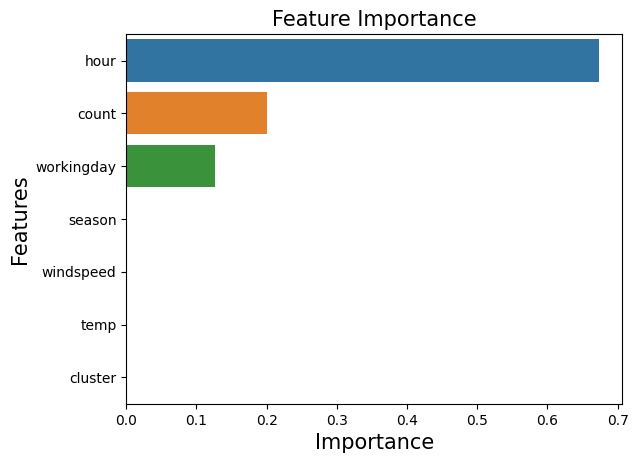

In [ ]:
FeatureImp(dt_model)

The plot shows that feature 'room_num' plays dominant role in contributing to the feature aspect of a house. It is followed by 'dist4' i.e distance from tech hub.

# Random Forest for Classification

In [ ]:
rf_classification = RandomForestClassifier(n_estimators = 10, random_state = 10)
rf_model = rf_classification.fit(xc_train, yc_train)

**Calculate performance measures on the train set.**

In [ ]:
train_report = get_train_report(rf_model)

print(train_report)

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       118
           1       1.00      0.67      0.80         6

    accuracy                           0.98       124
   macro avg       0.99      0.83      0.90       124
weighted avg       0.98      0.98      0.98       124



**Calculate performance measures on the test set.**

In [ ]:
test_report_rf, y_pred_rf = get_test_report(rf_model)
print(test_report_rf)

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1089
           1       0.00      0.00      0.00        36

    accuracy                           0.96      1125
   macro avg       0.48      0.50      0.49      1125
weighted avg       0.94      0.96      0.95      1125



<a id="hyper_rf"></a>
## 4.1 Tune the Hyperparameters using GridSearchCV (Random Forest)

In [ ]:
tuned_paramaters = [{'criterion': ['entropy', 'gini'],
                     'max_depth': [10, 15, 20],
                     'max_leaf_nodes': [5, 8, 11]}]

random_forest_classification = RandomForestClassifier(random_state = 10)
rf_grid = GridSearchCV(estimator = random_forest_classification,
                       param_grid = tuned_paramaters,
                       cv = 5)
rf_grid_model = rf_grid.fit(xc_train, yc_train)

print('Best parameters for random forest classifier: ', rf_grid_model.best_params_, '\n')

Best parameters for random forest classifier:  {'criterion': 'entropy', 'max_depth': 10, 'max_leaf_nodes': 5} 



#### Build the model using the tuned hyperparameters.

In [ ]:
rf_model = RandomForestClassifier(criterion = rf_grid_model.best_params_.get('criterion'),
                                  max_depth = rf_grid_model.best_params_.get('max_depth'),
                                  max_leaf_nodes = rf_grid_model.best_params_.get('max_leaf_nodes'),
                                  random_state = 10)

rf_model = rf_model.fit(xc_train, yc_train)
print('Classification Report for test set:\n', get_test_report(rf_model))

Classification Report for test set:
 ('              precision    recall  f1-score   support\n\n           0       0.97      1.00      0.98      1089\n           1       0.00      0.00      0.00        36\n\n    accuracy                           0.97      1125\n   macro avg       0.48      0.50      0.49      1125\nweighted avg       0.94      0.97      0.95      1125\n', array([0, 0, 0, ..., 0, 0, 0]))


### Identify the Important Features

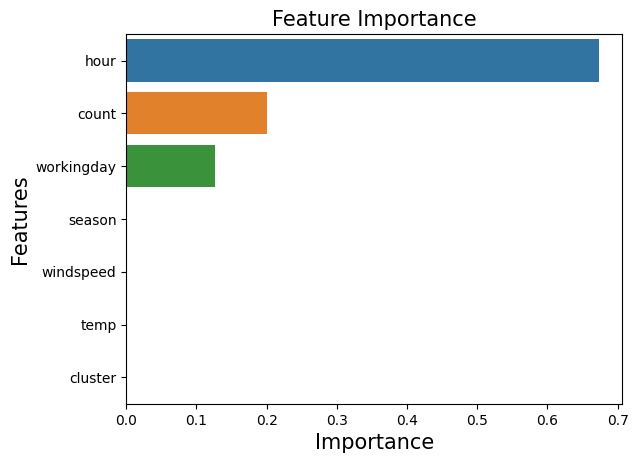

In [ ]:
FeatureImp(rf_model)

In [ ]:
train_report = get_train_report(rf_model)

print(train_report)

              precision    recall  f1-score   support

           0       0.95      1.00      0.98       118
           1       0.00      0.00      0.00         6

    accuracy                           0.95       124
   macro avg       0.48      0.50      0.49       124
weighted avg       0.91      0.95      0.93       124



# Muller Loop Classifier

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

In [ ]:
from sklearn import metrics
def muller_classification(X_train5, X_test5, y_train5, y_test5):
  names = [
    "Nearest Neighbors", "Linear SVM", "RBF SVM",
         "Decision Tree", "Random Forest",
         "Neural Net", "AdaBoost",
         "Naive Bayes"
         ]

  classifiers = [
    KNeighborsClassifier(2),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(criterion = rf_grid_model.best_params_.get('criterion'),
                                  max_depth = rf_grid_model.best_params_.get('max_depth'),
                                  max_leaf_nodes = rf_grid_model.best_params_.get('max_leaf_nodes'),
                                  random_state = 10), MLPClassifier(alpha=1, max_iter=1000), AdaBoostClassifier(), GaussianNB()]


  max_score = 0.0
  max_class = ''
  # iterate over classifiers
  metrics_df = pd.DataFrame({
      'Classifier': [],
      'MSE' : [],
      'MAE': [],
      'RSquared': [],
      'Test Accuracy': [],
      'Recall':[],
      'Precision': []
      })
  global m_pred
  m_pred = {}

  for name, clf in zip(names, classifiers):
    print(name)
    clf.fit(X_train5, y_train5)
    y_pred5 = clf.predict(X_test5)
    score = 100.0 * clf.score(X_test5, y_test5)
    mean_absolute_error = np.round(metrics.mean_absolute_error(y_test5, y_pred5), 2)
    mean_squared_error = np.round(metrics.mean_squared_error(y_test5, y_pred5), 2)
    r_squared = np.round(metrics.r2_score(y_test5, y_pred5), 2)
    test_acc = metrics.accuracy_score(y_test5, y_pred5) * 100
    recall = metrics.recall_score(y_test5, y_pred5, average = 'weighted')
    precision = metrics.precision_score(y_test5, y_pred5, average = 'weighted')
    new_row = pd.DataFrame({
    'Classifier': name,
    'MSE' : mean_absolute_error,
    'MAE': mean_squared_error,
    'RSquared': r_squared,
    'Test Accuracy': test_acc,
    'Recall': recall,
    'Precision': precision}, index=[0])

    m_pred[name] = {
        'y_pred' : y_pred5,
        'y_test': y_test5
    }

    metrics_df = pd.concat([new_row,metrics_df.loc[:]]).reset_index(drop=True)

    print('Classifier = %s, Score (test, accuracy) = %.2f,' %(name, score))
    if score > max_score:
        clf_best = clf
        max_score = score
        max_class = name

  print('Best --> Classifier = %s, Score (test, accuracy) = %.2f' %(max_class, max_score))

  return metrics_df

In [ ]:
metrics_df = muller_classification(xc_train, xc_test, yc_train, yc_test)
metrics_df.head(10)

Nearest Neighbors
Classifier = Nearest Neighbors, Score (test, accuracy) = 96.80,
Linear SVM
Classifier = Linear SVM, Score (test, accuracy) = 96.80,
RBF SVM
Classifier = RBF SVM, Score (test, accuracy) = 96.80,
Decision Tree
Classifier = Decision Tree, Score (test, accuracy) = 90.49,
Random Forest
Classifier = Random Forest, Score (test, accuracy) = 96.80,
Neural Net
Classifier = Neural Net, Score (test, accuracy) = 96.80,
AdaBoost
Classifier = AdaBoost, Score (test, accuracy) = 95.11,
Naive Bayes
Classifier = Naive Bayes, Score (test, accuracy) = 84.80,
Best --> Classifier = Nearest Neighbors, Score (test, accuracy) = 96.80


Classifier      MSE      MAE  RSquared  Test Accuracy   Recall  \
0        Naive Bayes 0.150000 0.150000 -3.910000      84.800000 0.848000   
1           AdaBoost 0.050000 0.050000 -0.580000      95.111111 0.951111   
2         Neural Net 0.030000 0.030000 -0.030000      96.800000 0.968000   
3      Random Forest 0.030000 0.030000 -0.030000      96.800000 0.968000   
4      Decision Tree 0.100000 0.100000 -2.070000      90.488889 0.904889   
5            RBF SVM 0.030000 0.030000 -0.030000      96.800000 0.968000   
6         Linear SVM 0.030000 0.030000 -0.030000      96.800000 0.968000   
7  Nearest Neighbors 0.030000 0.030000 -0.030000      96.800000 0.968000   

   Precision  
0   0.945242  
1   0.938835  
2   0.937024  
3   0.937024  
4   0.937509  
5   0.937024  
6   0.937024  
7   0.937024

# Muller Loop Regressor

### Muller Loop Function

In [ ]:
def muller_loop(x_train5, x_test5, y_train5, y_test5):
  max_score = 0.0
  max_class = ''
  # iterate over regressors
  metrics_dataf = pd.DataFrame({
      'Regressor': [],
      'MSE' : [],
      'MAE': [],
      'RSquared': [],
      'Test Accuracy': []
      })
  for name, reg in zip(names, regressors):
      reg.fit(x_train5, y_train5)
      y_pred5 = reg.predict(x_test5)
      score = 100.0 * reg.score(x_test5, y_test5)
      mean_absolute_error = np.round(metrics.mean_absolute_error(y_test5, y_pred5), 2)
      mean_squared_error = np.round(metrics.mean_squared_error(y_test5, y_pred5), 2)
      r_squared = np.round(metrics.r2_score(y_test5, y_pred5), 2)
      new_row = pd.DataFrame({
      'Regressor': name,
      'MSE' : mean_absolute_error,
      'MAE': mean_squared_error,
      'RSquared': r_squared,
      'Test Accuracy': score}, index=[0])
      metrics_dataf = pd.concat([new_row,metrics_dataf.loc[:]]).reset_index(drop=True)


      print('Regressor = %s, Score (test, accuracy) = %.2f,' %(name, score))
      if score > max_score:
          reg_best = reg
          max_score = score
          max_class = name

  print('Best --> Regressor = %s, Score (test, accuracy) = %.2f' %(max_class, max_score))

In [ ]:
xr = data.drop(["date", "c"], axis=1)
yr = data["count"]

xr_train, xr_test, yr_train, yr_test = train_test_split(xr, yr, test_size=0.9)

In [ ]:
muller_loop(xr_train, xr_test, yr_train, yr_test)

Regressor = Linear Regression, Score (test, accuracy) = 100.00,
Regressor = MLP Regressor, Score (test, accuracy) = 100.00,
Regressor = RandomForest Regressor, Score (test, accuracy) = 98.56,
Regressor = Gradient Boosting Regressor, Score (test, accuracy) = 98.95,
Regressor = KNeighbors Regressor, Score (test, accuracy) = 99.09,
Best --> Regressor = Linear Regression, Score (test, accuracy) = 100.00


# Confusion Matrix and Metrics

In [ ]:
def confMatrix(y_test5, y_pred5):
  cm = confusion_matrix(y_test5, y_pred5)
  conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])

  return (cm, conf_matrix)

def plot_cm(conf_matrix):
  sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = ListedColormap(['lightskyblue']), cbar = False,
              linewidths = 0.1, annot_kws = {'size':25})
  plt.xticks(fontsize = 20)
  plt.yticks(fontsize = 20)
  plt.show()

In [ ]:
yc_pred_dt = decision_tree.predict(xc_test)

In [ ]:
cm_dt, conf_matrix_dt = confMatrix(yc_test, yc_pred_dt)

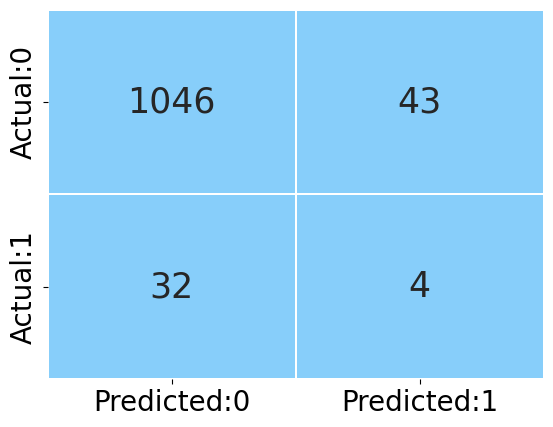

In [ ]:
plot_cm(conf_matrix_dt)

In [ ]:
def calculateMetrics(cm, y_test5, y_pred5):
  # True Negatives are denoted by 'TN'
  # Actual 'O' values which are classified correctly
  TN = cm[0,0]

  # True Positives are denoted by 'TP'
  # Actual '1' values which are classified correctly
  TP = cm[1,1]

  # False Positives are denoted by 'FP'
  # it is the type 1 error
  # Actual 'O' values which are classified wrongly as '1'
  FP = cm[0,1]

  # False Negatives are denoted by 'FN'
  # it is the type 2 error
  # Actual '1' values which are classified wrongly as '0'
  FN = cm[1,0]

  precision = TP / (TP+FP)
  recall = TP / (TP+FN)
  specificity = TN / (TN+FP)
  f1_score = 2*((precision*recall)/(precision+recall))
  accuracy = (TN+TP) / (TN+FP+FN+TP)
  acc_table = classification_report(y_test5, y_pred5)
  return acc_table


In [ ]:
metrics_dt = calculateMetrics(cm_dt, yc_test, yc_pred_dt)
print(metrics_dt)

              precision    recall  f1-score   support

           0       0.97      0.96      0.97      1089
           1       0.09      0.11      0.10        36

    accuracy                           0.93      1125
   macro avg       0.53      0.54      0.53      1125
weighted avg       0.94      0.93      0.94      1125



In [ ]:
def ROC(y_test5, y_pred5):
  fpr, tpr, thresholds = roc_curve(y_test5, y_pred5)

  plt.plot(fpr, tpr)

  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.0])
  plt.plot([0, 1], [0, 1],'r--')
  plt.title('ROC curve', fontsize = 15)
  plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
  plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)

  plt.text(x = 0.02, y = 0.9, s = ('AUC Score:', round(metrics.roc_auc_score(y_test5, y_pred5),4)))
  plt.grid(True)

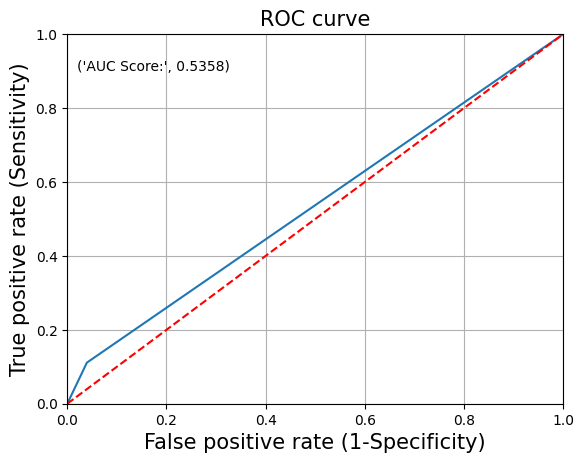

In [ ]:
ROC(yc_test, yc_pred_dt)

# SMOTE

In [ ]:
import imblearn
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler, EditedNearestNeighbours

In [ ]:
counter = Counter(yc_train)
print('Before',counter)
# oversampling the train dataset using SMOTE
smt = SMOTE()
#X_train, y_train = smt.fit_resample(X_train, y_train)
xc_train_sm, yc_train_sm = smt.fit_resample(xc_train, yc_train)

counter = Counter(yc_train_sm)
print('After',counter)

Before Counter({0: 118, 1: 6})
After Counter({0: 118, 1: 118})


In [ ]:
counter1 = Counter(yc_train)
print('Before',counter1)

rus = RandomUnderSampler()

xc_train_rus, yc_train_rus = rus.fit_resample(xc_train, yc_train)
counter1 = Counter(yc_train_rus)
print('After',counter1)

Before Counter({0: 118, 1: 6})
After Counter({0: 6, 1: 6})


In [ ]:
model5 = list()
resample = list()
precision = list()
recall = list()
F1score = list()
AUCROC = list()

In [ ]:
def test_eval(clf_model5, X_test5, y_test5, algo=None, sampling=None):
    # Test set prediction
    y_prob5=clf_model5.predict_proba(X_test5)
    y_pred5=clf_model5.predict(X_test5)

    print('Confusion Matrix')
    print('='*60)
    print(confusion_matrix(y_test5,y_pred5),"\n")
    print('Classification Report')
    print('='*60)
    print(classification_report(y_test5,y_pred5),"\n")
    print('AUC-ROC')
    print('='*60)
    print(roc_auc_score(y_test5, y_prob5[:,1]))

    model5.append(algo)
    precision.append(precision_score(y_test5,y_pred5))
    recall.append(recall_score(y_test5,y_pred5))
    F1score.append(f1_score(y_test5,y_pred5))
    AUCROC.append(roc_auc_score(y_test5, y_prob5[:,1]))
    resample.append(sampling)

##Decision Tree

### Original Data

In [ ]:
estimators = [10,30, 50]
max_depth = [i for i in range(5,10, 2)]
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 5]

tree_param_grid = {
'max_depth' :max_depth,
'min_samples_split' : min_samples_split,
'min_samples_leaf' : min_samples_leaf
}

In [ ]:
cv = StratifiedKFold(n_splits=5, random_state=100, shuffle=True)

In [ ]:
clf_DT = RandomizedSearchCV(dt_model, tree_param_grid, cv=cv, scoring='roc_auc', n_jobs=-1, verbose=2)
clf_DT.fit(xc_train, yc_train)
clf_DT.best_estimator_

Fitting 5 folds for each of 10 candidates, totalling 50 fits


DecisionTreeClassifier(max_depth=9, max_leaf_nodes=6, min_samples_split=5,
                       random_state=10)

In [ ]:
test_eval(clf_DT, xc_test, yc_test, 'Decision Tree', 'actual')

Confusion Matrix
[[1028   61]
 [  32    4]] 

Classification Report
              precision    recall  f1-score   support

           0       0.97      0.94      0.96      1089
           1       0.06      0.11      0.08        36

    accuracy                           0.92      1125
   macro avg       0.52      0.53      0.52      1125
weighted avg       0.94      0.92      0.93      1125
 

AUC-ROC
0.5314508723599632


###SMOTE Resampling

In [ ]:
clf_DT.fit(xc_train_sm, yc_train_sm)
clf_DT.best_estimator_

Fitting 5 folds for each of 10 candidates, totalling 50 fits


DecisionTreeClassifier(max_depth=9, max_leaf_nodes=6, min_samples_split=10,
                       random_state=10)

In [ ]:
test_eval(clf_DT, xc_test, yc_test, 'Decision Tree', 'smote')

Confusion Matrix
[[961 128]
 [ 30   6]] 

Classification Report
              precision    recall  f1-score   support

           0       0.97      0.88      0.92      1089
           1       0.04      0.17      0.07        36

    accuracy                           0.86      1125
   macro avg       0.51      0.52      0.50      1125
weighted avg       0.94      0.86      0.90      1125
 

AUC-ROC
0.4962631364146516


### Random Under Sampling

In [ ]:
clf_DT.fit(xc_train_rus, yc_train_rus)
clf_DT.best_estimator_

Fitting 5 folds for each of 10 candidates, totalling 50 fits


DecisionTreeClassifier(max_depth=9, max_leaf_nodes=6, min_samples_leaf=2,
                       min_samples_split=10, random_state=10)

In [ ]:
test_eval(clf_DT, xc_test, yc_test, 'Decision Tree', 'RandomUnderSampler')

Confusion Matrix
[[853 236]
 [ 15  21]] 

Classification Report
              precision    recall  f1-score   support

           0       0.98      0.78      0.87      1089
           1       0.08      0.58      0.14        36

    accuracy                           0.78      1125
   macro avg       0.53      0.68      0.51      1125
weighted avg       0.95      0.78      0.85      1125
 

AUC-ROC
0.6833103764921947


## Random Forest

### Original Unsampled Data

In [ ]:
rf_model = RandomForestClassifier()

rf_params={'n_estimators':estimators,
           'max_depth':max_depth,
           'min_samples_split':min_samples_split}

clf_RF = RandomizedSearchCV(rf_model, rf_params, cv=cv, scoring='roc_auc', n_jobs=-1, n_iter=20, verbose=2)
clf_RF.fit(xc_train, yc_train)
clf_RF.best_estimator_

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomForestClassifier(max_depth=9, n_estimators=30)

In [ ]:
test_eval(clf_RF, xc_test, yc_test, 'Random Forest', 'actual')

Confusion Matrix
[[1086    3]
 [  36    0]] 

Classification Report
              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1089
           1       0.00      0.00      0.00        36

    accuracy                           0.97      1125
   macro avg       0.48      0.50      0.49      1125
weighted avg       0.94      0.97      0.95      1125
 

AUC-ROC
0.6745102540557086


### SMOTE Resampling

In [ ]:
clf_RF.fit(xc_train_sm, yc_train_sm)
clf_RF.best_estimator_

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomForestClassifier(max_depth=7, min_samples_split=5, n_estimators=30)

In [ ]:
test_eval(clf_RF, xc_test, yc_test, 'Random Forest', 'smote')

Confusion Matrix
[[1009   80]
 [  32    4]] 

Classification Report
              precision    recall  f1-score   support

           0       0.97      0.93      0.95      1089
           1       0.05      0.11      0.07        36

    accuracy                           0.90      1125
   macro avg       0.51      0.52      0.51      1125
weighted avg       0.94      0.90      0.92      1125
 

AUC-ROC
0.6734899500051016


### Random Under Sampling

In [ ]:
clf_RF.fit(xc_train_rus, yc_train_rus)
clf_RF.best_estimator_

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomForestClassifier(max_depth=9, min_samples_split=5, n_estimators=50)

In [ ]:
test_eval(clf_RF, xc_test, yc_test, 'Decision Tree', 'RandomUnderSampler')

Confusion Matrix
[[520 569]
 [ 11  25]] 

Classification Report
              precision    recall  f1-score   support

           0       0.98      0.48      0.64      1089
           1       0.04      0.69      0.08        36

    accuracy                           0.48      1125
   macro avg       0.51      0.59      0.36      1125
weighted avg       0.95      0.48      0.62      1125
 

AUC-ROC
0.6474849505152536


# Model Comparison

In [ ]:
clf_eval_df = pd.DataFrame({'model':model5,
                            'resample':resample,
                            'precision':precision,
                            'recall':recall,
                            'f1-score':F1score,
                            'AUC-ROC':AUCROC})

In [ ]:
clf_eval_df

model            resample  precision   recall  f1-score  AUC-ROC
0  Decision Tree              actual   0.061538 0.111111  0.079208 0.531451
1  Decision Tree               smote   0.044776 0.166667  0.070588 0.496263
2  Decision Tree  RandomUnderSampler   0.081712 0.583333  0.143345 0.683310
3  Random Forest              actual   0.000000 0.000000  0.000000 0.674510
4  Random Forest               smote   0.047619 0.111111  0.066667 0.673490
5  Decision Tree  RandomUnderSampler   0.042088 0.694444  0.079365 0.647485

# Holoviews - Data Distribution

In [ ]:
!pip install -qU hvplot

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 22.1 MB/s eta 0:00:00


<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
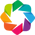

In [ ]:
import holoviews as hv
hv.extension('bokeh')
import hvplot.pandas
import panel as pn
from sklearn.metrics import confusion_matrix, roc_curve

In [ ]:
hv.extension('bokeh')
season_text = pn.widgets.StaticText(name='season', value='')

select_season = pn.widgets.RadioBoxGroup(
    name='season', options=['Winter', 'Summer', 'Autumn', 'Spring'],
    inline=True)

workingday_text = pn.widgets.StaticText(name='workingday', value='')
select_workingday = pn.widgets.RadioBoxGroup(
    name='workingday', options=['Yes','No'],
    inline=True)

select_temp = pn.widgets.IntSlider(name='temp', start= int(min(data['temp'])), end= int(max(data['temp'])), step = 1)
@pn.depends(select_season, select_workingday, select_temp)

def exp_plot(select_season, select_workingday, select_temp):
  return data[(data.season==select_season) &(data.workingday==select_workingday) & (data.temp <= select_temp)].sort_values(by='count').hvplot(x='count', y = 'windspeed')

pn.Column(season_text, select_season, workingday_text, select_workingday, select_temp, exp_plot).embed()

# Interactive Holoviews plot

In [ ]:
# holoviews confusion
def hv_confusion_matrix(y_pred5,
                        y_test5,
                        title='Confusion matrix'):
    tn, fp, fn, tp = confusion_matrix(y_test5,  y_pred5).ravel()
    pdf = pd.DataFrame(zip(y_pred5, yc_train), columns=['Prediction', 'Actual'])

    graph = pdf.groupby(['Prediction', 'Actual']).size().to_frame().reset_index()
    confusion = graph.rename(columns={0: 'Count'})
    # in a format for holoviews
    conf_values = map(lambda l: [str(l[0]), str(l[1]), l[2]], [a.tolist() for a in confusion.values])
    return hv.HeatMap(conf_values, label='Confusion Matrix', kdims=['Predicted', 'Actual'], vdims=['Count']).sort().options(
        xrotation=45, width=500, height=500, cmap='blues', tools=['hover'], invert_yaxis=True, zlim=(0,1))

In [ ]:
# holoviews ROC_Curve
def hv_roc_curve(y_pred5, y_test5):
  fpr, tpr, _ = roc_curve(y_test5,  y_pred5)
  roc_df = pd.DataFrame(zip(fpr, tpr), columns=['Specificity', 'Sensitivity'])
  return roc_df.hvplot(x='Specificity', y = 'Sensitivity')

In [ ]:
def upsample(dframe, n):
  dframe = resample(dframe, n_samples=n, replace=True)
  return dframe

def downsample(dframe, n):
  dframe = resample(dframe, n_samples=n, replace=False)
  return dframe

In [ ]:
from sklearn.utils import resample

def exp_plot(event):
  temp_df = pd.concat( [xc, yc], axis = 1)
  temp_df = resample(temp_df, n_samples=select_sample_size.value)
  temp_target = temp_df['holiday']
  temp_train_df = temp_df.drop(['holiday'], axis=1)
  X_train_temp, X_test_temp, y_train_temp, y_test_temp = train_test_split(temp_train_df, temp_target, random_state = 10, test_size = 0.2)
  muller_classification(X_train_temp, X_test_temp, y_train_temp, y_test_temp)

In [ ]:
random = pd.concat([xc, yc], axis = 1)
random = resample(random, n_samples=len(random))
random_tar = random.iloc[:, -1]
random.drop(['holiday'], inplace=True, axis=1)
X_train, X_test, y_train, y_test = train_test_split(random, random_tar, random_state = 10, test_size = 0.2)
muller_classification(xc_train, xc_test, yc_train, yc_test)

Nearest Neighbors
Classifier = Nearest Neighbors, Score (test, accuracy) = 96.80,
Linear SVM
Classifier = Linear SVM, Score (test, accuracy) = 96.80,
RBF SVM
Classifier = RBF SVM, Score (test, accuracy) = 96.80,
Decision Tree
Classifier = Decision Tree, Score (test, accuracy) = 90.93,
Random Forest
Classifier = Random Forest, Score (test, accuracy) = 96.80,
Neural Net
Classifier = Neural Net, Score (test, accuracy) = 96.80,
AdaBoost
Classifier = AdaBoost, Score (test, accuracy) = 95.11,
Naive Bayes
Classifier = Naive Bayes, Score (test, accuracy) = 84.80,
Best --> Classifier = Nearest Neighbors, Score (test, accuracy) = 96.80


Classifier      MSE      MAE  RSquared  Test Accuracy   Recall  \
0        Naive Bayes 0.150000 0.150000 -3.910000      84.800000 0.848000   
1           AdaBoost 0.050000 0.050000 -0.580000      95.111111 0.951111   
2         Neural Net 0.030000 0.030000 -0.030000      96.800000 0.968000   
3      Random Forest 0.030000 0.030000 -0.030000      96.800000 0.968000   
4      Decision Tree 0.090000 0.090000 -1.930000      90.933333 0.909333   
5            RBF SVM 0.030000 0.030000 -0.030000      96.800000 0.968000   
6         Linear SVM 0.030000 0.030000 -0.030000      96.800000 0.968000   
7  Nearest Neighbors 0.030000 0.030000 -0.030000      96.800000 0.968000   

   Precision  
0   0.945242  
1   0.938835  
2   0.937024  
3   0.937024  
4   0.940257  
5   0.937024  
6   0.937024  
7   0.937024

Nearest Neighbors 
Classifier = Nearest Neighbors, Score (test, accuracy) = 96.67, 
Linear SVM 
Classifier = Linear SVM, Score (test, accuracy) = 96.67, 
RBF SVM 
Classifier = RBF SVM, Score (test, accuracy) = 97.78, 
Decision Tree 
Classifier = Decision Tree, Score (test, accuracy) = 88.89, 
Random Forest 
Classifier = Random Forest, Score (test, accuracy) = 96.67, 
Neural Net 
Classifier = Neural Net, Score (test, accuracy) = 96.67, 
AdaBoost 
Classifier = AdaBoost, Score (test, accuracy) = 93.33, 
Naive Bayes 
Classifier = Naive Bayes, Score (test, accuracy) = 95.56, 
Best --> Classifier = RBF SVM, Score (test, accuracy) = 97.78

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
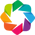

Column
    [0] StaticText(name='Select Number o...)
    [1] IntSlider(end=800, name='SampleSize', start=400, step=10, value=400)
    [2] Button(button_type='primary', name='Run Muller Loop')

In [ ]:
hv.extension('bokeh')

#Differnt Ui Items
samples_text = pn.widgets.StaticText(name='Select Number of Samples', value='')
select_sample_size = pn.widgets.IntSlider(name='SampleSize', start= 400, end= 800, step = 10)
# feature_text = pn.widgets.StaticText(name='Select Sampling', value='')
# select_feature = pn.widgets.RadioBoxGroup( name='Feature', options=['Base','Upsample', 'Downsample'], inline=True)
button = pn.widgets.Button(name='Run Muller Loop', button_type='primary')

button.on_click(exp_plot)
pn.Column(samples_text, select_sample_size, button)

In [ ]:
hv.extension('bokeh')
model_text = pn.widgets.StaticText(name='Model', value='')
select_model = pn.widgets.RadioBoxGroup( name='model', options=["Nearest Neighbors", "Linear SVM", "RBF SVM",
         "Decision Tree", "Random Forest",
         "Neural Net", "AdaBoost",
         "Naive Bayes"], inline=True)

@pn.depends(select_model)
def plot_conf_roc(select_model):
  y_test5 = m_pred[select_model]['y_test']
  y_pred5 = m_pred[select_model]['y_pred']

  return hv_roc_curve(y_pred5, y_test5) + hv_confusion_matrix(y_pred5, y_test5)

pn.Column(model_text, select_model, plot_conf_roc).embed()

The predictive accuracy increased substantially after the second round of data enrichment. It began at 66%, then increased to 74%, and finally reached an impressive 95.83% when the Müller Regression was combined with the Gradient Boosting Regressor.

In addition, to determine the best regression model for our dataset, we ran a thorough modeling analysis that included both the Müller MLP and the Gradient Boosting Regressor. Following a thorough evaluation, it became clear that the Gradient Boosting Regressor outperforms other models, connecting its standing as the best regression model for our specific dataset.